In [349]:
!pip install pytrends
import pandas as pd
from pytrends.request import TrendReq


import numpy as np
import matplotlib
import matplotlib.pyplot as plt


pytrend = TrendReq(hl='en-US', tz=300)    #US EST

# Symptoms to investigate
kw_list1 = ["Cough", "Coughing", "Wheeze", "Wheezing"]    
#kw_list1 = ["Cough", "Coughing"]  
kw_list2 = ["Sneeze", "Sneezing"]
kw_list3 = ["Shortness of breath", "Out of breath", "Breathless"]
kw_list4 = ["Sore throat", "throat hurts", "throat pain"]
kw_list5 = ["Runny nose", "nose blocked", "congestion"]
kw_list6 = ["fever", "high temperature"]
kw_list7 = ["muscle pain", "muscle ache"]
kw_list8 = ["fatigue", "exhausted", "tiredness"]
kw_list9 = ["anosmia", "ageusia", "loss of taste", "loss of smell", "can't taste"]
kw_list10 = ["Chills", "Shivering", "Shivers"]
kw_list11 = ["Swollen toes", "toes swollen", "toe inflamation"]
kw_list12 = ["coronavirus", "COVID-19", "coronavirus symptoms" "severe acute respiratory syndrome"]
kw_list13 = ["flu symptoms", "allergy symptoms"]
kw_list14 = ["Covid test sites", "coronavirus test sites", "coronavirus testing"]


def calculate_normscore(kw_list, year):
  #pytrend.build_payload(kw_list, timeframe='2019-12-29 2020-05-4', geo='US-NY')
  tf = str(year)+'-01-1 '+str(year)+'-05-1'
  pytrend.build_payload(kw_list, timeframe=tf, geo='US-NY')
  df = pytrend.interest_over_time()
  list_length = len(kw_list);
  index_list = list(range(0, list_length + 1))
  df = df.iloc[:,index_list]
  df_aggregate = df.iloc[:, 0]
  for index in index_list[1:list_length]:
    df_aggregate = df_aggregate.add(other = df.iloc[:, index])
  df_normalized = df_aggregate / (list_length * 100);
  return df_normalized


def fit_mult_linear(X,y):
    """
    Given matrix of predictors X and target vector y fit for a multiple linear regression model under the squared loss.
    """
    ones = np.ones((X.shape[0],1));
    X_orig = X;
    X = np.hstack((ones,X_orig));
    Xmat = np.matrix(X);
    ymat = np.matrix(y);
    ymat_trans=np.transpose(ymat);
    Xmat_trans=np.transpose(Xmat);
    beta = np.linalg.inv(Xmat_trans*Xmat)*Xmat_trans*ymat_trans;   # dimension doesn't work if ymat used instead of ymat_trans
    return beta


In [0]:
cough_normalized2020 = calculate_normscore(kw_list1, 2020)
cough_normalized2019 = calculate_normscore(kw_list1, 2019)
cough_normalized2018 = calculate_normscore(kw_list1, 2018)
cough_normalized2017 = calculate_normscore(kw_list1, 2017)
cough_normalized2016 = calculate_normscore(kw_list1, 2016)
cough_normalized2015 = calculate_normscore(kw_list1, 2015)
cough_normalized2014 = calculate_normscore(kw_list1, 2014)
cough_normalized2013 = calculate_normscore(kw_list1, 2013)
cough_normalized2012 = calculate_normscore(kw_list1, 2012)
cough_normalized2011 = calculate_normscore(kw_list1, 2011)
cough_normalized2010 = calculate_normscore(kw_list1, 2010)
cough_normalized2009 = calculate_normscore(kw_list1, 2009)

In [214]:
# drop Feb 2/29 in leap years before combining with other years
print("Normalized daily Google Trends scores for the symptom COUGH 01/01-01/05 from 2009 to 2020")
cough_normalized2012list = cough_normalized2012.drop(labels = [pd.Timestamp('2012-02-09')]).tolist()
cough_normalized2016list = cough_normalized2016.drop(labels = [pd.Timestamp('2016-02-09')]).tolist()
cough_normalized2020list = cough_normalized2020.drop(labels = [pd.Timestamp('2020-02-09')]).tolist()


cough_dict = {'2009': cough_normalized2009.tolist(), '2010': cough_normalized2010.tolist(), '2011': cough_normalized2011.tolist(), '2012': cough_normalized2012list, '2013': cough_normalized2013.tolist(), '2014': cough_normalized2014.tolist(), '2015': cough_normalized2015.tolist(), '2016': cough_normalized2016list, '2017': cough_normalized2017.tolist(), '2018': cough_normalized2018.tolist(), '2019': cough_normalized2019.tolist(), '2020': cough_normalized2020list }
cough_df = pd.DataFrame(cough_dict)
cough_df



Normalized daily Google Trends scores for the symptom COUGH 01/01-01/05 from 2009 to 2020


,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,0.1250,0.1925,0.3100,0.2450,0.2450,0.2725,0.3000,0.2125,0.2450,0.2625,0.3425,0.1950
1,0.1275,0.1375,0.3200,0.3000,0.2625,0.2725,0.3425,0.2875,0.2475,0.2900,0.3100,0.1475
2,0.2625,0.1100,0.2150,0.2175,0.2600,0.3025,0.2950,0.2975,0.2625,0.2750,0.3400,0.1725
3,0.1500,0.2550,0.1875,0.1800,0.2475,0.3575,0.2425,0.2775,0.3150,0.2075,0.2775,0.1500
4,0.2225,0.1450,0.1425,0.1475,0.3125,0.2925,0.2475,0.2675,0.2750,0.2425,0.3250,0.1475
...,...,...,...,...,...,...,...,...,...,...,...,...
116,0.1300,0.0825,0.1450,0.1500,0.2275,0.1550,0.1875,0.1825,0.1700,0.1700,0.2025,0.1125
117,0.2025,0.1275,0.1300,0.1375,0.1075,0.2100,0.1525,0.1650,0.1350,0.1550,0.1675,0.0850
118,0.2675,0.1750,0.1850,0.1275,0.1000,0.2200,0.1600,0.1250,0.1675,0.2125,0.1800,0.0975
119,0.1925,0.1750,0.1350,0.1575,0.1700,0.2075,0.1800,0.1875,0.1925,0.1175,0.2075,0.0975


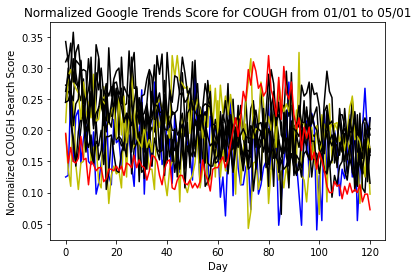

In [215]:
# plot Day (x-axis) vs. Normalized Google Trends Score for COUGH (y-axis) from 2009-2020
ycough2009 = cough_df['2009'].values; # 2009 score trend
ycough2010 = cough_df['2010'].values; 
ycough2011 = cough_df['2011'].values; 
ycough2012 = cough_df['2012'].values; 
ycough2013 = cough_df['2013'].values; 
ycough2014 = cough_df['2014'].values; 
ycough2015 = cough_df['2015'].values; 
ycough2016 = cough_df['2016'].values; 
ycough2017 = cough_df['2017'].values; 
ycough2018 = cough_df['2018'].values; 
ycough2019 = cough_df['2019'].values; 
ycough2020 = cough_df['2020'].values; 
# x-axis from 0 to 120 (121 days)
# H1N1: January 2009 to August 2010
# Coronavirus: January 2020 to Present
plt.plot(ycough2009,'b');
plt.plot(ycough2010,'y');
plt.plot(ycough2011,'k');
plt.plot(ycough2012,'k');
plt.plot(ycough2013,'k');
plt.plot(ycough2014,'k');
plt.plot(ycough2016,'y');
plt.plot(ycough2017,'k');
plt.plot(ycough2018,'k');
plt.plot(ycough2019,'k');
plt.plot(ycough2020,'r');
plt.title(label = 'Normalized Google Trends Score for COUGH from 01/01 to 05/01')
plt.xlabel("Day");
plt.ylabel("Normalized COUGH Search Score");




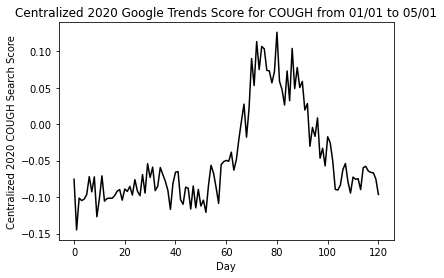

In [343]:
ydiff_cough = ycough2020 - (ycough2011 + ycough2012 + ycough2013 + ycough2014 + ycough2015 + ycough2016 + ycough2017 + ycough2018 + ycough2019)/9
plt.plot(ydiff_cough,'k');
plt.title(label = 'Centralized 2020 Google Trends Score for COUGH from 01/01 to 05/01')
plt.xlabel("Day");
plt.ylabel("Centralized 2020 COUGH Search Score");

Text(0, 0.5, 'ytrain_cough_pred')

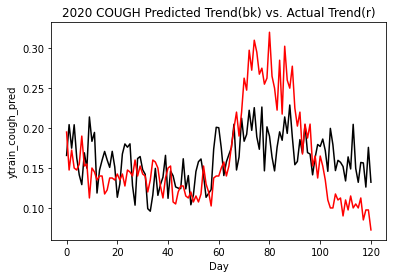

In [358]:
# MLR on 2011-2019 vs 2020
Xtrain_cough = cough_df[['2011','2012','2013','2014','2015','2016','2017','2018','2019']].values
ytrain_cough = cough_df['2020'].values

beta_cough = fit_mult_linear(Xtrain_cough, ytrain_cough)
ones = np.ones((Xtrain_cough.shape[0],1))
Xt_orig = Xtrain_cough
Xtrain_cough = np.hstack((ones,Xt_orig))
Xmat_train = np.matrix(Xtrain_cough)
ymat = np.matrix(ytrain_cough)

ytrain_cough_pred = Xmat_train*beta_cough
errs = np.array(ymat - ytrain_cough_pred)
lossm = np.sum(errs**2)



plt.title('2020 COUGH Predicted Trend(bk) vs. Actual Trend(r)')
plt.plot(ytrain_cough_pred,'k')  # predicted 2020
plt.plot(ytrain_cough, 'r')      # actual 2020
plt.xlabel("Day")
plt.ylabel("ytrain_cough_pred")

Text(0, 0.5, 'ytrain_cough_pred1')

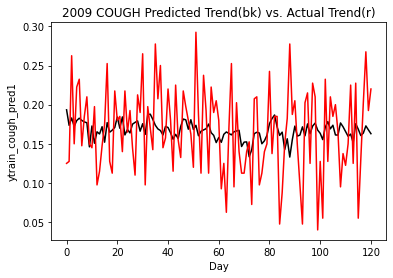

In [359]:
# MLR on 2011-2019 vs 2009
Xtrain_cough = cough_df[['2011','2012','2013','2014','2015','2016','2017','2018','2019']].values
ytrain_cough1 = cough_df['2009'].values

beta_cough1 = fit_mult_linear(Xtrain_cough, ytrain_cough1)
ymat1 = np.matrix(ytrain_cough1)

ytrain_cough_pred1 = Xmat_train*beta_cough1
errs1 = np.array(ymat1 - ytrain_cough_pred1)
lossm1 = np.sum(errs1**2)




plt.title('2009 COUGH Predicted Trend(bk) vs. Actual Trend(r)')
plt.plot(ytrain_cough_pred1,'k') # predicted 2009
plt.plot(ytrain_cough1, 'r')     # actual 2009
plt.xlabel("Day")
plt.ylabel("ytrain_cough_pred1")

Text(0, 0.5, 'ytrain_cough_pred2')

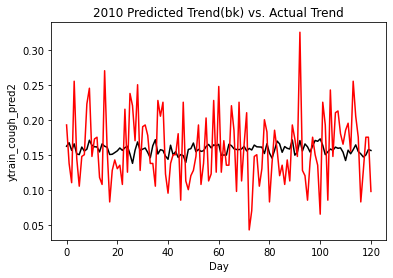

In [360]:
Xtrain_cough = cough_df[['2011','2012','2013','2014','2015','2016','2017','2018','2019']].values
ytrain_cough2 = cough_df['2010'].values

beta_cough2 = fit_mult_linear(Xtrain_cough, ytrain_cough2)
ymat2 = np.matrix(ytrain_cough2)

ytrain_cough_pred2 = Xmat_train*beta_cough2
errs2 = np.array(ymat2 - ytrain_cough_pred2)
lossm2 = np.sum(errs2**2)




plt.title('2010 Predicted Trend(bk) vs. Actual Trend')
plt.plot(ytrain_cough_pred2,'k') # predicted 2010
plt.plot(ytrain_cough2, 'r')     # actual 2010
plt.xlabel("Day")
plt.ylabel("ytrain_cough_pred2")

In [0]:
sneeze_normalized2020 = calculate_normscore(kw_list2, 2020)
sneeze_normalized2019 = calculate_normscore(kw_list2, 2019)
sneeze_normalized2018 = calculate_normscore(kw_list2, 2018)
sneeze_normalized2017 = calculate_normscore(kw_list2, 2017)
sneeze_normalized2016 = calculate_normscore(kw_list2, 2016)
sneeze_normalized2015 = calculate_normscore(kw_list2, 2015)
sneeze_normalized2014 = calculate_normscore(kw_list2, 2014)
sneeze_normalized2013 = calculate_normscore(kw_list2, 2013)
sneeze_normalized2012 = calculate_normscore(kw_list2, 2012)
sneeze_normalized2011 = calculate_normscore(kw_list2, 2011)
sneeze_normalized2010 = calculate_normscore(kw_list2, 2010)
sneeze_normalized2009 = calculate_normscore(kw_list2, 2009)

In [231]:
# drop Feb 2/29 in leap years before combining with other years
print("Normalized daily Google Trends scores for the symptom SNEEZE 01/01-01/05 from 2009 to 2020")
sneeze_normalized2012list = sneeze_normalized2012.drop(labels = [pd.Timestamp('2012-02-09')]).tolist()
sneeze_normalized2016list = sneeze_normalized2016.drop(labels = [pd.Timestamp('2016-02-09')]).tolist()
sneeze_normalized2020list = sneeze_normalized2020.drop(labels = [pd.Timestamp('2020-02-09')]).tolist()
sneeze_dict = {'2009': sneeze_normalized2009.tolist(), '2010': sneeze_normalized2010.tolist(), '2011': sneeze_normalized2011.tolist(), '2012': sneeze_normalized2012list, '2013': sneeze_normalized2013.tolist(), '2014': sneeze_normalized2014.tolist(), '2015': sneeze_normalized2015.tolist(), '2016': sneeze_normalized2016list, '2017': sneeze_normalized2017.tolist(), '2018': sneeze_normalized2018.tolist(), '2019': sneeze_normalized2019.tolist() , '2020': sneeze_normalized2020list}
sneeze_df = pd.DataFrame(sneeze_dict)
sneeze_df

Normalized daily Google Trends scores for the symptom SNEEZE 01/01-01/05 from 2009 to 2020


,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,0.000,0.215,0.475,0.720,0.105,0.335,0.420,0.520,0.450,0.750,0.435,0.290
1,0.200,0.365,0.870,0.450,0.375,0.260,0.650,0.460,0.435,0.335,0.510,0.145
2,0.480,0.175,0.325,0.155,0.360,0.195,0.650,0.590,0.190,0.315,0.610,0.260
3,0.700,0.120,0.370,0.465,0.495,0.490,0.640,0.365,0.460,0.540,0.595,0.195
4,0.000,0.115,0.370,0.195,0.350,0.300,0.225,0.370,0.355,0.585,0.575,0.265
...,...,...,...,...,...,...,...,...,...,...,...,...
116,0.150,0.210,0.290,0.565,0.275,0.080,0.450,0.280,0.260,0.240,0.655,0.260
117,0.435,0.110,0.285,0.325,0.315,0.095,0.315,0.475,0.315,0.250,0.315,0.375
118,0.365,0.230,0.200,0.225,0.240,0.245,0.500,0.410,0.570,0.270,0.540,0.280
119,0.300,0.250,0.315,0.360,0.325,0.210,0.315,0.550,0.810,0.320,0.350,0.245


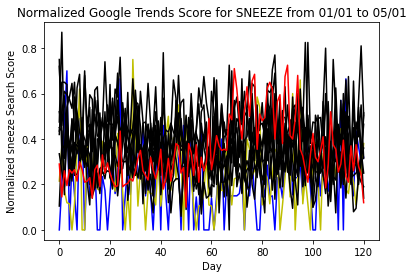

In [220]:
# plot Day (x-axis) vs. Normalized Google Trends Score for SNEEZE (y-axis) from 2009-2020
ysneeze2009 = sneeze_df['2009'].values; # 2009 score trend
ysneeze2010 = sneeze_df['2010'].values; 
ysneeze2011 = sneeze_df['2011'].values; 
ysneeze2012 = sneeze_df['2012'].values; 
ysneeze2013 = sneeze_df['2013'].values; 
ysneeze2014 = sneeze_df['2014'].values; 
ysneeze2015 = sneeze_df['2015'].values; 
ysneeze2016 = sneeze_df['2016'].values; 
ysneeze2017 = sneeze_df['2017'].values; 
ysneeze2018 = sneeze_df['2018'].values; 
ysneeze2019 = sneeze_df['2019'].values; 
ysneeze2020 = sneeze_df['2020'].values; 
# x-axis from 0 to 120 (121 days)
# H1N1: January 2009 to August 2010
# Coronavirus: January 2020 to Present
plt.plot(ysneeze2009,'b');
plt.plot(ysneeze2010,'y');
plt.plot(ysneeze2011,'k');
plt.plot(ysneeze2012,'k');
plt.plot(ysneeze2013,'k');
plt.plot(ysneeze2014,'k');
plt.plot(ysneeze2015,'k');
plt.plot(ysneeze2016,'k');
plt.plot(ysneeze2017,'k');
plt.plot(ysneeze2018,'k');
plt.plot(ysneeze2019,'k');
plt.plot(ysneeze2020,'r');
plt.title(label = 'Normalized Google Trends Score for SNEEZE from 01/01 to 05/01')
plt.xlabel("Day");
plt.ylabel("Normalized sneeze Search Score");


Text(0, 0.5, 'ytrain_sneeze_pred')

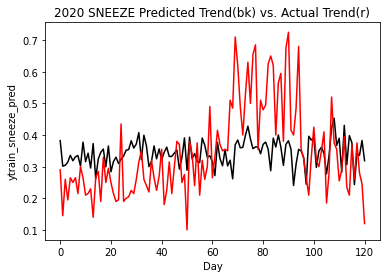

In [362]:
# MLR on 2011-2019 vs 2020
Xtrain_sneeze = sneeze_df[['2011','2012','2013','2014','2015','2016','2017','2018','2019']].values
ytrain_sneeze = sneeze_df['2020'].values

beta_sneeze = fit_mult_linear(Xtrain_sneeze, ytrain_sneeze)
ones = np.ones((Xtrain_sneeze.shape[0],1))
Xt_orig = Xtrain_sneeze
Xtrain_sneeze = np.hstack((ones,Xt_orig))
Xmat_train = np.matrix(Xtrain_sneeze)
ymat = np.matrix(ytrain_sneeze)

ytrain_sneeze_pred = Xmat_train*beta_sneeze
errs = np.array(ymat - ytrain_sneeze_pred)
lossm = np.sum(errs**2)

plt.title('2020 SNEEZE Predicted Trend(bk) vs. Actual Trend(r)')
plt.plot(ytrain_sneeze_pred,'k')  # predicted 2020
plt.plot(ytrain_sneeze, 'r')      # actual 2020
plt.xlabel("Day")
plt.ylabel("ytrain_sneeze_pred")

In [0]:
# MLR on 2011-2019 vs 2010
Xtrain_sneeze = sneeze_df[['2011','2012','2013','2014','2015','2016','2017','2018','2019']].values
ytrain_sneeze1 = sneeze_df['2009'].values

beta_sneeze1 = fit_mult_linear(Xtrain_sneeze, ytrain_sneeze1)
ymat1 = np.matrix(ytrain_sneeze1)

ytrain_sneeze_pred1 = Xmat_train*beta_sneeze1
errs1 = np.array(ymat1 - ytrain_sneeze_pred1)
lossm1 = np.sum(errs1**2)

Text(0, 0.5, 'ytrain_sneeze_pred')

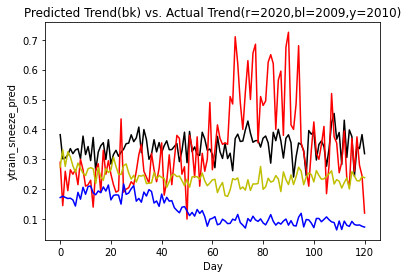

In [306]:
Xtrain_cough = cough_df[['2011','2012','2013','2014','2015','2016','2017','2018','2019']].values
ytrain_sneeze2 = sneeze_df['2010'].values

beta_sneeze2 = fit_mult_linear(Xtrain_sneeze, ytrain_sneeze2)
ymat2 = np.matrix(ytrain_sneeze2)

ytrain_sneeze_pred2 = Xmat_train*beta_sneeze2
errs2 = np.array(ymat2 - ytrain_sneeze_pred2)
lossm2 = np.sum(errs2**2)



In [0]:
breath_normalized2020 = calculate_normscore(kw_list3, 2020)
breath_normalized2019 = calculate_normscore(kw_list3, 2019)
breath_normalized2018 = calculate_normscore(kw_list3, 2018)
breath_normalized2017 = calculate_normscore(kw_list3, 2017)
breath_normalized2016 = calculate_normscore(kw_list3, 2016)
breath_normalized2015 = calculate_normscore(kw_list3, 2015)
breath_normalized2014 = calculate_normscore(kw_list3, 2014)
breath_normalized2013 = calculate_normscore(kw_list3, 2013)
breath_normalized2012 = calculate_normscore(kw_list3, 2012)
breath_normalized2011 = calculate_normscore(kw_list3, 2011)
breath_normalized2010 = calculate_normscore(kw_list3, 2010)
breath_normalized2009 = calculate_normscore(kw_list3, 2009)

In [346]:
# drop Feb 2/29 in leap years before combining with other years
print("Normalized daily Google Trends scores for the symptom BREATH between 01/01-01/05 from 2009 to 2019")
breath_normalized2012list = breath_normalized2012.drop(labels = [pd.Timestamp('2012-02-09')]).tolist()
breath_normalized2016list = breath_normalized2016.drop(labels = [pd.Timestamp('2016-02-09')]).tolist()
breath_normalized2020list = breath_normalized2020.drop(labels = [pd.Timestamp('2020-02-09')]).tolist()
breath_dict = {'2009': breath_normalized2009.tolist(), '2010': breath_normalized2010.tolist(), '2011': breath_normalized2011.tolist(), '2012': breath_normalized2012list, '2013': breath_normalized2013.tolist(), '2014': breath_normalized2014.tolist(), '2015': breath_normalized2015.tolist(), '2016': breath_normalized2016list, '2017': breath_normalized2017.tolist(), '2018': breath_normalized2018.tolist(), '2019': breath_normalized2019.tolist() , '2020': breath_normalized2020list}
breath_df = pd.DataFrame(breath_dict)
breath_df

Normalized daily Google Trends scores for the symptom BREATH between 01/01-01/05 from 2009 to 2019


,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,0.000,0.000,0.000,0.000,0.220,0.255,0.350,0.150,0.340,0.125,0.265,0.075
1,0.000,0.255,0.140,0.290,0.215,0.000,0.280,0.000,0.410,0.245,0.300,0.085
2,0.000,0.000,0.225,0.165,0.125,0.100,0.615,0.000,0.105,0.275,0.335,0.115
3,0.000,0.330,0.165,0.165,0.385,0.115,0.000,0.215,0.315,0.090,0.235,0.160
4,0.350,0.245,0.110,0.500,0.100,0.225,0.380,0.430,0.475,0.190,0.270,0.080
...,...,...,...,...,...,...,...,...,...,...,...,...
116,0.245,0.300,0.100,0.485,0.170,0.475,0.130,0.000,0.350,0.300,0.620,0.225
117,0.155,0.155,0.100,0.605,0.220,0.285,0.190,0.205,0.210,0.250,0.200,0.150
118,0.000,0.160,0.210,0.195,0.205,0.095,0.390,0.210,0.260,0.340,0.315,0.180
119,0.160,0.175,0.000,0.465,0.255,0.315,0.390,0.260,0.365,0.560,0.160,0.110


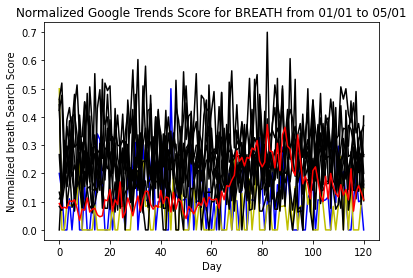

In [287]:
# plot Day (x-axis) vs. Normalized Google Trends Score for breath (y-axis) from 2009-2020
ybreath2009 = breath_df['2009'].values; # 2009 score trend
ybreath2010 = breath_df['2010'].values; 
ybreath2011 = breath_df['2011'].values; 
ybreath2012 = breath_df['2012'].values; 
ybreath2013 = breath_df['2013'].values; 
ybreath2014 = breath_df['2014'].values; 
ybreath2015 = breath_df['2015'].values; 
ybreath2016 = breath_df['2016'].values; 
ybreath2017 = breath_df['2017'].values; 
ybreath2018 = breath_df['2018'].values; 
ybreath2019 = breath_df['2019'].values; 
ybreath2020 = breath_df['2020'].values; 
# x-axis from 0 to 120 (121 days)
# H1N1: January 2009 to August 2010
# Coronavirus: January 2020 to Present
plt.plot(ybreath2009,'b');
plt.plot(ybreath2010,'y');
plt.plot(ybreath2011,'k');
plt.plot(ybreath2012,'k');
plt.plot(ybreath2013,'k');
plt.plot(ybreath2014,'k');
plt.plot(ybreath2015,'k');
plt.plot(ybreath2016,'k');
plt.plot(ybreath2017,'k');
plt.plot(ybreath2018,'k');
plt.plot(ybreath2019,'k');
plt.plot(ybreath2020,'r');
plt.title(label = 'Normalized Google Trends Score for BREATH from 01/01 to 05/01')
plt.xlabel("Day");
plt.ylabel("Normalized breath Search Score");


Text(0, 0.5, 'ytrain_breath_pred')

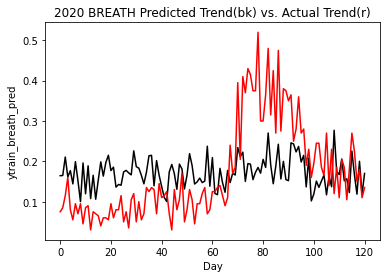

In [365]:
# MLR on 2011-2019 vs 2020
Xtrain_breath = breath_df[['2011','2012','2013','2014','2015','2016','2017','2018','2019']].values
ytrain_breath = breath_df['2020'].values

beta_breath = fit_mult_linear(Xtrain_breath, ytrain_breath)
ones = np.ones((Xtrain_breath.shape[0],1))
Xt_orig = Xtrain_breath
Xtrain_breath = np.hstack((ones,Xt_orig))
Xmat_train = np.matrix(Xtrain_breath)
ymat = np.matrix(ytrain_breath)

ytrain_breath_pred = Xmat_train*beta_breath
errs = np.array(ymat - ytrain_breath_pred)
lossm = np.sum(errs**2)

plt.title('2020 BREATH Predicted Trend(bk) vs. Actual Trend(r)')
plt.plot(ytrain_breath_pred,'k')  # predicted 2020
plt.plot(ytrain_breath, 'r')      # actual 2020
plt.xlabel("Day")
plt.ylabel("ytrain_breath_pred")

In [0]:
# MLR on 2011-2019 vs 2010
Xtrain_breath = breath_df[['2011','2012','2013','2014','2015','2016','2017','2018','2019']].values
ytrain_breath1 = breath_df['2009'].values

beta_breath1 = fit_mult_linear(Xtrain_breath, ytrain_breath1)
ymat1 = np.matrix(ytrain_breath1)

ytrain_breath_pred1 = Xmat_train*beta_breath1
errs1 = np.array(ymat1 - ytrain_breath_pred1)
lossm1 = np.sum(errs1**2)

In [0]:
Xtrain_breath = breath_df[['2011','2012','2013','2014','2015','2016','2017','2018','2019']].values
ytrain_breath2 = breath_df['2010'].values

beta_breath2 = fit_mult_linear(Xtrain_breath, ytrain_breath2)
ymat2 = np.matrix(ytrain_breath2)

ytrain_breath_pred2 = Xmat_train*beta_breath2
errs2 = np.array(ymat2 - ytrain_breath_pred2)
lossm2 = np.sum(errs2**2)



In [0]:
throat_normalized2020 = calculate_normscore(kw_list4, 2020)
throat_normalized2019 = calculate_normscore(kw_list4, 2019)
throat_normalized2018 = calculate_normscore(kw_list4, 2018)
throat_normalized2017 = calculate_normscore(kw_list4, 2017)
throat_normalized2016 = calculate_normscore(kw_list4, 2016)
throat_normalized2015 = calculate_normscore(kw_list4, 2015)
throat_normalized2014 = calculate_normscore(kw_list4, 2014)
throat_normalized2013 = calculate_normscore(kw_list4, 2013)
throat_normalized2012 = calculate_normscore(kw_list4, 2012)
throat_normalized2011 = calculate_normscore(kw_list4, 2011)
throat_normalized2010 = calculate_normscore(kw_list4, 2010)
throat_normalized2009 = calculate_normscore(kw_list4, 2009)

In [235]:
# drop Feb 2/29 in leap years before combining with other years
print("Normalized daily Google Trends scores for the symptom THROAT 01/01-01/05 from 2009 to 2019")
throat_normalized2012list = throat_normalized2012.drop(labels = [pd.Timestamp('2012-02-09')]).tolist()
throat_normalized2016list = throat_normalized2016.drop(labels = [pd.Timestamp('2016-02-09')]).tolist()
throat_normalized2020list = throat_normalized2020.drop(labels = [pd.Timestamp('2020-02-09')]).tolist()
throat_dict = {'2009': throat_normalized2009.tolist(), '2010': throat_normalized2010.tolist(), '2011': throat_normalized2011.tolist(), '2012': throat_normalized2012list, '2013': throat_normalized2013.tolist(), '2014': throat_normalized2014.tolist(), '2015': throat_normalized2015.tolist(), '2016': throat_normalized2016list, '2017': throat_normalized2017.tolist(), '2018': throat_normalized2018.tolist(), '2019': throat_normalized2019.tolist(), '2020': throat_normalized2020list }
throat_df = pd.DataFrame(throat_dict)
throat_df

Normalized daily Google Trends scores for the symptom THROAT 01/01-01/05 from 2009 to 2019


,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,0.200000,0.100000,0.213333,0.296667,0.273333,0.376667,0.180000,0.090000,0.236667,0.196667,0.396667,0.096667
1,0.070000,0.170000,0.263333,0.196667,0.320000,0.146667,0.296667,0.240000,0.300000,0.350000,0.346667,0.113333
2,0.166667,0.243333,0.273333,0.240000,0.310000,0.413333,0.403333,0.250000,0.333333,0.330000,0.313333,0.136667
3,0.250000,0.056667,0.326667,0.193333,0.200000,0.320000,0.296667,0.286667,0.400000,0.230000,0.320000,0.153333
4,0.280000,0.133333,0.253333,0.216667,0.353333,0.410000,0.233333,0.243333,0.220000,0.233333,0.303333,0.113333
...,...,...,...,...,...,...,...,...,...,...,...,...
116,0.000000,0.150000,0.163333,0.223333,0.293333,0.266667,0.133333,0.173333,0.326667,0.180000,0.313333,0.080000
117,0.180000,0.210000,0.146667,0.233333,0.150000,0.226667,0.216667,0.153333,0.353333,0.300000,0.260000,0.116667
118,0.156667,0.106667,0.153333,0.160000,0.193333,0.350000,0.216667,0.096667,0.366667,0.240000,0.170000,0.096667
119,0.210000,0.233333,0.250000,0.233333,0.290000,0.326667,0.176667,0.156667,0.310000,0.240000,0.266667,0.116667


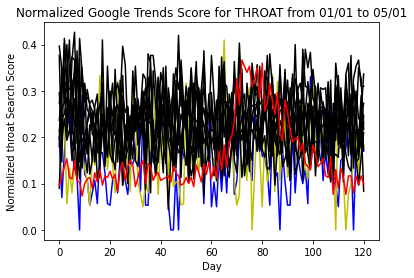

In [288]:
# plot Day (x-axis) vs. Normalized Google Trends Score for throat (y-axis) from 2009-2019
ythroat2009 = throat_df['2009'].values; # 2009 score trend
ythroat2010 = throat_df['2010'].values; 
ythroat2011 = throat_df['2011'].values; 
ythroat2012 = throat_df['2012'].values; 
ythroat2013 = throat_df['2013'].values; 
ythroat2014 = throat_df['2014'].values; 
ythroat2015 = throat_df['2015'].values; 
ythroat2016 = throat_df['2016'].values; 
ythroat2017 = throat_df['2017'].values; 
ythroat2018 = throat_df['2018'].values; 
ythroat2019 = throat_df['2019'].values; 
ythroat2020 = throat_df['2020'].values; 
# x-axis from 0 to 120 (121 days)
# H1N1: January 2009 to August 2010
# Coronavirus: January 2020 to Present
plt.plot(ythroat2009,'b');
plt.plot(ythroat2010,'y');
plt.plot(ythroat2011,'k');
plt.plot(ythroat2012,'k');
plt.plot(ythroat2013,'k');
plt.plot(ythroat2014,'k');
plt.plot(ythroat2015,'k');
plt.plot(ythroat2016,'k');
plt.plot(ythroat2017,'k');
plt.plot(ythroat2018,'k')
plt.plot(ythroat2019,'k')
plt.plot(ythroat2020,'r');
plt.title(label = 'Normalized Google Trends Score for THROAT from 01/01 to 05/01')
plt.xlabel("Day");
plt.ylabel("Normalized throat Search Score");


Text(0, 0.5, 'ytrain_throat_pred')

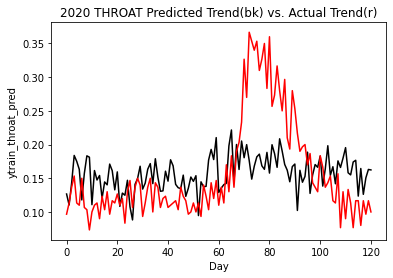

In [366]:
# MLR on 2011-2019 vs 2020
Xtrain_throat = throat_df[['2011','2012','2013','2014','2015','2016','2017','2018','2019']].values
ytrain_throat = throat_df['2020'].values

beta_throat = fit_mult_linear(Xtrain_throat, ytrain_throat)
ones = np.ones((Xtrain_throat.shape[0],1))
Xt_orig = Xtrain_throat
Xtrain_throat = np.hstack((ones,Xt_orig))
Xmat_train = np.matrix(Xtrain_throat)
ymat = np.matrix(ytrain_throat)

ytrain_throat_pred = Xmat_train*beta_throat
errs = np.array(ymat - ytrain_throat_pred)
lossm = np.sum(errs**2)

plt.title('2020 THROAT Predicted Trend(bk) vs. Actual Trend(r)')
plt.plot(ytrain_throat_pred,'k')  # predicted 2020
plt.plot(ytrain_throat, 'r')      # actual 2020
plt.xlabel("Day")
plt.ylabel("ytrain_throat_pred")

In [0]:
# MLR on 2011-2019 vs 2010
Xtrain_throat = throat_df[['2011','2012','2013','2014','2015','2016','2017','2018','2019']].values
ytrain_throat1 = throat_df['2009'].values

beta_throat1 = fit_mult_linear(Xtrain_throat, ytrain_throat1)
ymat1 = np.matrix(ytrain_throat1)

ytrain_throat_pred1 = Xmat_train*beta_throat1
errs1 = np.array(ymat1 - ytrain_throat_pred1)
lossm1 = np.sum(errs1**2)

In [0]:
Xtrain_throat = throat_df[['2011','2012','2013','2014','2015','2016','2017','2018','2019']].values
ytrain_throat2 = throat_df['2010'].values

beta_throat2 = fit_mult_linear(Xtrain_throat, ytrain_throat2)
ymat2 = np.matrix(ytrain_throat2)

ytrain_throat_pred2 = Xmat_train*beta_throat2
errs2 = np.array(ymat2 - ytrain_throat_pred2)
lossm2 = np.sum(errs2**2)

plt.title('Predicted Trend(bk) vs. Actual Trend(r=2020,bl=2009,y=2010)')
plt.plot(ytrain_throat_pred,'k')
plt.plot(ytrain_throat, 'r')
plt.plot(ytrain_throat_pred1,'b')
plt.plot(ytrain_throat_pred2,'y')
plt.xlabel("Day")
plt.ylabel("ytrain_throat_pred")

In [0]:
nose_normalized2020 = calculate_normscore(kw_list5, 2020)
nose_normalized2019 = calculate_normscore(kw_list5, 2019)
nose_normalized2018 = calculate_normscore(kw_list5, 2018)
nose_normalized2017 = calculate_normscore(kw_list5, 2017)
nose_normalized2016 = calculate_normscore(kw_list5, 2016)
nose_normalized2015 = calculate_normscore(kw_list5, 2015)
nose_normalized2014 = calculate_normscore(kw_list5, 2014)
nose_normalized2013 = calculate_normscore(kw_list5, 2013)
nose_normalized2012 = calculate_normscore(kw_list5, 2012)
nose_normalized2011 = calculate_normscore(kw_list5, 2011)
nose_normalized2010 = calculate_normscore(kw_list5, 2010)
nose_normalized2009 = calculate_normscore(kw_list5, 2009)

In [240]:
# drop Feb 2/29 in leap years before combining with other years
print("Normalized daily Google Trends scores for the symptom NOSE between 01/01-05/01 from 2009 to 2019")
nose_normalized2012list = nose_normalized2012.drop(labels = [pd.Timestamp('2012-02-09')]).tolist()
nose_normalized2016list = nose_normalized2016.drop(labels = [pd.Timestamp('2016-02-09')]).tolist()
nose_normalized2020list = nose_normalized2020.drop(labels = [pd.Timestamp('2020-02-09')]).tolist()
nose_dict = {'2009': nose_normalized2009.tolist(), '2010': nose_normalized2010.tolist(), '2011': nose_normalized2011.tolist(), '2012': nose_normalized2012list, '2013': nose_normalized2013.tolist(), '2014': nose_normalized2014.tolist(), '2015': nose_normalized2015.tolist(), '2016': nose_normalized2016list, '2017': nose_normalized2017.tolist(), '2018': nose_normalized2018.tolist(), '2019': nose_normalized2019.tolist(), '2020': nose_normalized2020list }
nose_df = pd.DataFrame(nose_dict)
nose_df

Normalized daily Google Trends scores for the symptom NOSE between 01/01-05/01 from 2009 to 2019


,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,0.200000,0.253333,0.380000,0.126667,0.410000,0.220000,0.480000,0.133333,0.420000,0.226667,0.170000,0.273333
1,0.110000,0.316667,0.400000,0.230000,0.270000,0.400000,0.456667,0.353333,0.260000,0.220000,0.110000,0.233333
2,0.133333,0.300000,0.186667,0.200000,0.373333,0.166667,0.290000,0.270000,0.293333,0.153333,0.116667,0.236667
3,0.063333,0.136667,0.186667,0.313333,0.246667,0.196667,0.543333,0.143333,0.356667,0.210000,0.120000,0.300000
4,0.196667,0.200000,0.260000,0.203333,0.400000,0.290000,0.390000,0.256667,0.423333,0.133333,0.136667,0.223333
...,...,...,...,...,...,...,...,...,...,...,...,...
116,0.040000,0.060000,0.170000,0.150000,0.383333,0.163333,0.273333,0.106667,0.206667,0.120000,0.050000,0.203333
117,0.040000,0.223333,0.116667,0.213333,0.170000,0.180000,0.236667,0.200000,0.156667,0.103333,0.096667,0.126667
118,0.080000,0.100000,0.073333,0.106667,0.240000,0.110000,0.200000,0.143333,0.170000,0.086667,0.080000,0.133333
119,0.163333,0.216667,0.063333,0.146667,0.243333,0.173333,0.280000,0.213333,0.196667,0.113333,0.060000,0.066667


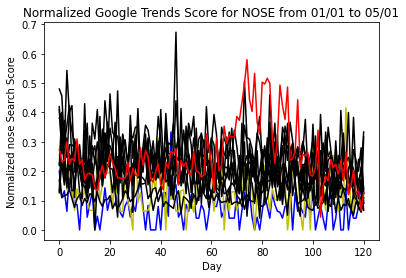

In [289]:
# plot Day (x-axis) vs. Normalized Google Trends Score for nose (y-axis) from 2009-2019
ynose2009 = nose_df['2009'].values; # 2009 score trend
ynose2010 = nose_df['2010'].values; 
ynose2011 = nose_df['2011'].values; 
ynose2012 = nose_df['2012'].values; 
ynose2013 = nose_df['2013'].values; 
ynose2014 = nose_df['2014'].values; 
ynose2015 = nose_df['2015'].values; 
ynose2016 = nose_df['2016'].values; 
ynose2017 = nose_df['2017'].values; 
ynose2018 = nose_df['2018'].values; 
ynose2019 = nose_df['2019'].values; 
ynose2020 = nose_df['2020'].values; 
# x-axis from 0 to 120 (121 days)
# H1N1: January 2009 to August 2010
# Coronavirus: January 2020 to Present
plt.plot(ynose2009,'b');
plt.plot(ynose2010,'y');
plt.plot(ynose2011,'k');
plt.plot(ynose2012,'k');
plt.plot(ynose2013,'k');
plt.plot(ynose2014,'k');
plt.plot(ynose2015,'k');
plt.plot(ynose2016,'k');
plt.plot(ynose2017,'k');
plt.plot(ynose2018,'k');
plt.plot(ynose2019,'k');
plt.plot(ynose2020,'r');
plt.title(label = 'Normalized Google Trends Score for NOSE from 01/01 to 05/01')
plt.xlabel("Day");
plt.ylabel("Normalized nose Search Score");


In [0]:
# MLR on 2011-2019 vs 2020
Xtrain_nose = nose_df[['2011','2012','2013','2014','2015','2016','2017','2018','2019']].values
ytrain_nose = nose_df['2020'].values

beta_nose = fit_mult_linear(Xtrain_nose, ytrain_nose)
ones = np.ones((Xtrain_nose.shape[0],1))
Xt_orig = Xtrain_nose
Xtrain_nose = np.hstack((ones,Xt_orig))
Xmat_train = np.matrix(Xtrain_nose)
ymat = np.matrix(ytrain_nose)

ytrain_nose_pred = Xmat_train*beta_nose
errs = np.array(ymat - ytrain_nose_pred)
lossm = np.sum(errs**2)


Text(0, 0.5, 'ytrain_nose_pred')

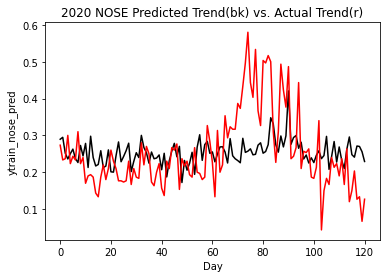

In [367]:
# MLR on 2011-2019 vs 2010
Xtrain_nose = nose_df[['2011','2012','2013','2014','2015','2016','2017','2018','2019']].values
ytrain_nose1 = nose_df['2009'].values

beta_nose1 = fit_mult_linear(Xtrain_nose, ytrain_nose1)
ymat1 = np.matrix(ytrain_nose1)

ytrain_nose_pred1 = Xmat_train*beta_nose1
errs1 = np.array(ymat1 - ytrain_nose_pred1)
lossm1 = np.sum(errs1**2)

plt.title('2020 NOSE Predicted Trend(bk) vs. Actual Trend(r)')
plt.plot(ytrain_nose_pred,'k')  # predicted 2020
plt.plot(ytrain_nose, 'r')      # actual 2020
plt.xlabel("Day")
plt.ylabel("ytrain_nose_pred")


In [0]:
Xtrain_nose = nose_df[['2011','2012','2013','2014','2015','2016','2017','2018','2019']].values
ytrain_nose2 = nose_df['2010'].values

beta_nose2 = fit_mult_linear(Xtrain_nose, ytrain_nose2)
ymat2 = np.matrix(ytrain_nose2)

ytrain_nose_pred2 = Xmat_train*beta_nose2
errs2 = np.array(ymat2 - ytrain_nose_pred2)
lossm2 = np.sum(errs2**2)

plt.title('Predicted Trend(bk) vs. Actual Trend(r=2020,bl=2009,y=2010)')
plt.plot(ytrain_nose_pred,'k')
plt.plot(ytrain_nose, 'r')
plt.plot(ytrain_nose_pred1,'b')
plt.plot(ytrain_nose_pred2,'y')
plt.xlabel("Day")
plt.ylabel("ytrain_nose_pred")

In [0]:
fever_normalized2020 = calculate_normscore(kw_list6, 2020)
fever_normalized2019 = calculate_normscore(kw_list6, 2019)
fever_normalized2018 = calculate_normscore(kw_list6, 2018)
fever_normalized2017 = calculate_normscore(kw_list6, 2017)
fever_normalized2016 = calculate_normscore(kw_list6, 2016)
fever_normalized2015 = calculate_normscore(kw_list6, 2015)
fever_normalized2014 = calculate_normscore(kw_list6, 2014)
fever_normalized2013 = calculate_normscore(kw_list6, 2013)
fever_normalized2012 = calculate_normscore(kw_list6, 2012)
fever_normalized2011 = calculate_normscore(kw_list6, 2011)
fever_normalized2010 = calculate_normscore(kw_list6, 2010)
fever_normalized2009 = calculate_normscore(kw_list6, 2009)

In [245]:
# drop Feb 2/29 in leap years before combining with other years
print("Normalized daily Google Trends scores for the symptom FEVER between 01/01-05/01 from 2009 to 2019")
fever_normalized2012list = fever_normalized2012.drop(labels = [pd.Timestamp('2012-02-09')]).tolist()
fever_normalized2016list = fever_normalized2016.drop(labels = [pd.Timestamp('2016-02-09')]).tolist()
fever_normalized2020list = fever_normalized2020.drop(labels = [pd.Timestamp('2020-02-09')]).tolist()
fever_dict = {'2009': fever_normalized2009.tolist(), '2010': fever_normalized2010.tolist(), '2011': fever_normalized2011.tolist(), '2012': fever_normalized2012list, '2013': fever_normalized2013.tolist(), '2014': fever_normalized2014.tolist(), '2015': fever_normalized2015.tolist(), '2016': fever_normalized2016list, '2017': fever_normalized2017.tolist(), '2018': fever_normalized2018.tolist(), '2019': fever_normalized2019.tolist(), '2020': fever_normalized2020list }
fever_df = pd.DataFrame(fever_dict)
fever_df

Normalized daily Google Trends scores for the symptom FEVER between 01/01-05/01 from 2009 to 2019


,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,0.170,0.405,0.405,0.260,0.400,0.305,0.325,0.380,0.340,0.260,0.470,0.160
1,0.295,0.265,0.345,0.190,0.265,0.350,0.230,0.370,0.295,0.255,0.405,0.155
2,0.560,0.480,0.330,0.270,0.285,0.365,0.315,0.415,0.445,0.290,0.425,0.145
3,0.375,0.460,0.455,0.220,0.385,0.465,0.300,0.270,0.265,0.310,0.385,0.190
4,0.345,0.345,0.330,0.235,0.285,0.395,0.315,0.345,0.300,0.205,0.295,0.155
...,...,...,...,...,...,...,...,...,...,...,...,...
116,0.350,0.375,0.295,0.205,0.255,0.390,0.295,0.285,0.210,0.200,0.350,0.120
117,0.270,0.385,0.335,0.190,0.310,0.345,0.335,0.350,0.210,0.205,0.350,0.140
118,0.385,0.445,0.305,0.180,0.325,0.300,0.290,0.270,0.245,0.180,0.340,0.140
119,0.260,0.275,0.220,0.185,0.260,0.320,0.255,0.280,0.260,0.230,0.310,0.145


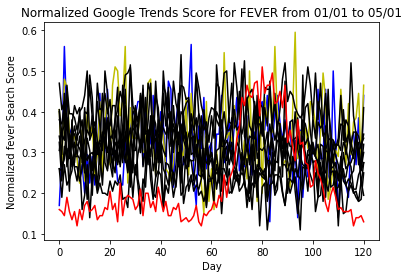

In [290]:
# plot Day (x-axis) vs. Normalized Google Trends Score for fever (y-axis) from 2009-2019
yfever2009 = fever_df['2009'].values; # 2009 score trend
yfever2010 = fever_df['2010'].values; 
yfever2011 = fever_df['2011'].values; 
yfever2012 = fever_df['2012'].values; 
yfever2013 = fever_df['2013'].values; 
yfever2014 = fever_df['2014'].values; 
yfever2015 = fever_df['2015'].values; 
yfever2016 = fever_df['2016'].values; 
yfever2017 = fever_df['2017'].values; 
yfever2018 = fever_df['2018'].values; 
yfever2019 = fever_df['2019'].values; 
yfever2020 = fever_df['2020'].values; 
# x-axis from 0 to 120 (121 days)
# H1N1: January 2009 to August 2010
# Coronavirus: January 2020 to Present
plt.plot(yfever2009,'b');
plt.plot(yfever2010,'y');
plt.plot(yfever2011,'k');
plt.plot(yfever2012,'k');
plt.plot(yfever2013,'k');
plt.plot(yfever2014,'k');
plt.plot(yfever2015,'k');
plt.plot(yfever2016,'k');
plt.plot(yfever2017,'k');
plt.plot(yfever2018,'k');
plt.plot(yfever2019,'k');
plt.plot(yfever2020,'r');
plt.title(label = 'Normalized Google Trends Score for FEVER from 01/01 to 05/01')
plt.xlabel("Day");
plt.ylabel("Normalized fever Search Score");


Text(0, 0.5, 'ytrain_fever_pred')

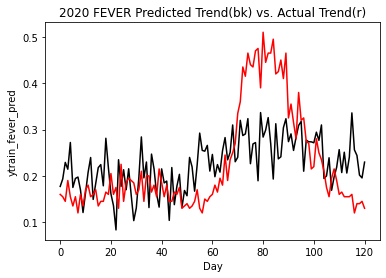

In [368]:
# MLR on 2011-2019 vs 2020
Xtrain_fever = fever_df[['2011','2012','2013','2014','2015','2016','2017','2018','2019']].values
ytrain_fever = fever_df['2020'].values

beta_fever = fit_mult_linear(Xtrain_fever, ytrain_fever)
ones = np.ones((Xtrain_fever.shape[0],1))
Xt_orig = Xtrain_fever
Xtrain_fever = np.hstack((ones,Xt_orig))
Xmat_train = np.matrix(Xtrain_fever)
ymat = np.matrix(ytrain_fever)

ytrain_fever_pred = Xmat_train*beta_fever
errs = np.array(ymat - ytrain_fever_pred)
lossm = np.sum(errs**2)

plt.title('2020 FEVER Predicted Trend(bk) vs. Actual Trend(r)')
plt.plot(ytrain_fever_pred,'k')  # predicted 2020
plt.plot(ytrain_fever, 'r')      # actual 2020
plt.xlabel("Day")
plt.ylabel("ytrain_fever_pred")

In [0]:
# MLR on 2011-2019 vs 2010
Xtrain_fever = fever_df[['2011','2012','2013','2014','2015','2016','2017','2018','2019']].values
ytrain_fever1 = fever_df['2009'].values

beta_fever1 = fit_mult_linear(Xtrain_fever, ytrain_fever1)
ymat1 = np.matrix(ytrain_fever1)

ytrain_fever_pred1 = Xmat_train*beta_fever1
errs1 = np.array(ymat1 - ytrain_fever_pred1)
lossm1 = np.sum(errs1**2)

In [0]:
Xtrain_fever = fever_df[['2011','2012','2013','2014','2015','2016','2017','2018','2019']].values
ytrain_fever2 = fever_df['2010'].values

beta_fever2 = fit_mult_linear(Xtrain_fever, ytrain_fever2)
ymat2 = np.matrix(ytrain_fever2)

ytrain_fever_pred2 = Xmat_train*beta_fever2
errs2 = np.array(ymat2 - ytrain_fever_pred2)
lossm2 = np.sum(errs2**2)

plt.title('Predicted Trend(bk) vs. Actual Trend(r=2020,bl=2009,y=2010)')
plt.plot(ytrain_fever_pred,'k')
plt.plot(ytrain_fever, 'r')
plt.plot(ytrain_fever_pred1,'b')
plt.plot(ytrain_fever_pred2,'y')
plt.xlabel("Day")
plt.ylabel("ytrain_fever_pred")

In [0]:
pain_normalized2020 = calculate_normscore(kw_list7, 2020)
pain_normalized2019 = calculate_normscore(kw_list7, 2019)
pain_normalized2018 = calculate_normscore(kw_list7, 2018)
pain_normalized2017 = calculate_normscore(kw_list7, 2017)
pain_normalized2016 = calculate_normscore(kw_list7, 2016)
pain_normalized2015 = calculate_normscore(kw_list7, 2015)
pain_normalized2014 = calculate_normscore(kw_list7, 2014)
pain_normalized2013 = calculate_normscore(kw_list7, 2013)
pain_normalized2012 = calculate_normscore(kw_list7, 2012)
pain_normalized2011 = calculate_normscore(kw_list7, 2011)
pain_normalized2010 = calculate_normscore(kw_list7, 2010)
pain_normalized2009 = calculate_normscore(kw_list7, 2009)

In [250]:
print("Normalized daily Google Trends scores for the symptom FEVER between 01/01-05/01 from 2009 to 2019")
pain_normalized2012list = pain_normalized2012.drop(labels = [pd.Timestamp('2012-02-09')]).tolist()
pain_normalized2016list = pain_normalized2016.drop(labels = [pd.Timestamp('2016-02-09')]).tolist()
pain_normalized2020list = pain_normalized2020.drop(labels = [pd.Timestamp('2020-02-09')]).tolist()
pain_dict = {'2009': pain_normalized2009.tolist(), '2010': pain_normalized2010.tolist(), '2011': pain_normalized2011.tolist(), '2012': pain_normalized2012list, '2013': pain_normalized2013.tolist(), '2014': pain_normalized2014.tolist(), '2015': pain_normalized2015.tolist(), '2016': pain_normalized2016list, '2017': pain_normalized2017.tolist(), '2018': pain_normalized2018.tolist(), '2019': pain_normalized2019.tolist(), '2020': pain_normalized2020list }
pain_df = pd.DataFrame(pain_dict)
pain_df

Normalized daily Google Trends scores for the symptom FEVER between 01/01-05/01 from 2009 to 2019


,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,0.500,0.250,0.000,0.135,0.250,0.165,0.135,0.480,0.115,0.120,0.180,0.155
1,0.000,0.000,0.250,0.000,0.285,0.220,0.145,0.140,0.270,0.255,0.265,0.300
2,0.425,0.195,0.100,0.095,0.425,0.315,0.245,0.320,0.210,0.300,0.195,0.175
3,0.405,0.135,0.200,0.145,0.190,0.110,0.200,0.150,0.270,0.385,0.335,0.360
4,0.000,0.000,0.100,0.385,0.230,0.215,0.130,0.305,0.275,0.365,0.275,0.250
...,...,...,...,...,...,...,...,...,...,...,...,...
116,0.260,0.000,0.090,0.235,0.190,0.075,0.200,0.220,0.115,0.255,0.380,0.245
117,0.000,0.000,0.090,0.345,0.490,0.155,0.330,0.255,0.060,0.275,0.165,0.160
118,0.000,0.000,0.095,0.170,0.325,0.240,0.235,0.230,0.370,0.435,0.290,0.155
119,0.000,0.285,0.120,0.450,0.280,0.150,0.170,0.275,0.315,0.150,0.340,0.210


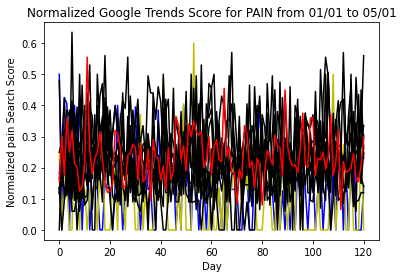

In [291]:
# plot Day (x-axis) vs. Normalized Google Trends Score for pain (y-axis) from 2009-2019
ypain2009 = pain_df['2009'].values; # 2009 score trend
ypain2010 = pain_df['2010'].values; 
ypain2011 = pain_df['2011'].values; 
ypain2012 = pain_df['2012'].values; 
ypain2013 = pain_df['2013'].values; 
ypain2014 = pain_df['2014'].values; 
ypain2015 = pain_df['2015'].values; 
ypain2016 = pain_df['2016'].values; 
ypain2017 = pain_df['2017'].values; 
ypain2018 = pain_df['2018'].values; 
ypain2019 = pain_df['2019'].values; 
ypain2020 = pain_df['2020'].values; 
# x-axis from 0 to 120 (121 days)
# H1N1: January 2009 to August 2010
# Coronavirus: January 2020 to Present
plt.plot(ypain2009,'b');
plt.plot(ypain2010,'y');
plt.plot(ypain2011,'k');
plt.plot(ypain2012,'k');
plt.plot(ypain2013,'k');
plt.plot(ypain2014,'k');
plt.plot(ypain2015,'k');
plt.plot(ypain2016,'k');
plt.plot(ypain2017,'k');
plt.plot(ypain2018,'k');
plt.plot(ypain2019,'k');
plt.plot(ypain2020,'r');
plt.title(label = 'Normalized Google Trends Score for PAIN from 01/01 to 05/01')
plt.xlabel("Day");
plt.ylabel("Normalized pain Search Score");


Text(0, 0.5, 'ytrain_pain_pred')

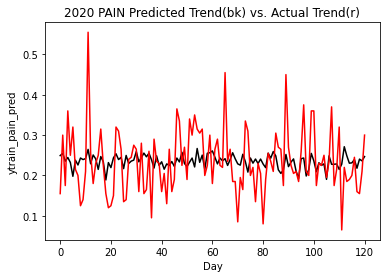

In [370]:
# MLR on 2011-2019 vs 2020
Xtrain_pain = pain_df[['2011','2012','2013','2014','2015','2016','2017','2018','2019']].values
ytrain_pain = pain_df['2020'].values

beta_pain = fit_mult_linear(Xtrain_pain, ytrain_pain)
ones = np.ones((Xtrain_pain.shape[0],1))
Xt_orig = Xtrain_pain
Xtrain_pain = np.hstack((ones,Xt_orig))
Xmat_train = np.matrix(Xtrain_pain)
ymat = np.matrix(ytrain_pain)

ytrain_pain_pred = Xmat_train*beta_pain
errs = np.array(ymat - ytrain_pain_pred)
lossm = np.sum(errs**2)

plt.title('2020 PAIN Predicted Trend(bk) vs. Actual Trend(r)')
plt.plot(ytrain_pain_pred,'k')  # predicted 2020
plt.plot(ytrain_pain, 'r')      # actual 2020
plt.xlabel("Day")
plt.ylabel("ytrain_pain_pred")


In [0]:
# MLR on 2011-2019 vs 2010
Xtrain_pain = pain_df[['2011','2012','2013','2014','2015','2016','2017','2018','2019']].values
ytrain_pain1 = pain_df['2009'].values

beta_pain1 = fit_mult_linear(Xtrain_pain, ytrain_pain1)
ymat1 = np.matrix(ytrain_pain1)

ytrain_pain_pred1 = Xmat_train*beta_pain1
errs1 = np.array(ymat1 - ytrain_pain_pred1)
lossm1 = np.sum(errs1**2)

In [0]:
Xtrain_pain = pain_df[['2011','2012','2013','2014','2015','2016','2017','2018','2019']].values
ytrain_pain2 = pain_df['2010'].values

beta_pain2 = fit_mult_linear(Xtrain_pain, ytrain_pain2)
ymat2 = np.matrix(ytrain_pain2)

ytrain_pain_pred2 = Xmat_train*beta_pain2
errs2 = np.array(ymat2 - ytrain_pain_pred2)
lossm2 = np.sum(errs2**2)



In [0]:
fatigue_normalized2020 = calculate_normscore(kw_list8, 2020)
fatigue_normalized2019 = calculate_normscore(kw_list8, 2019)
fatigue_normalized2018 = calculate_normscore(kw_list8, 2018)
fatigue_normalized2017 = calculate_normscore(kw_list8, 2017)
fatigue_normalized2016 = calculate_normscore(kw_list8, 2016)
fatigue_normalized2015 = calculate_normscore(kw_list8, 2015)
fatigue_normalized2014 = calculate_normscore(kw_list8, 2014)
fatigue_normalized2013 = calculate_normscore(kw_list8, 2013)
fatigue_normalized2012 = calculate_normscore(kw_list8, 2012)
fatigue_normalized2011 = calculate_normscore(kw_list8, 2011)
fatigue_normalized2010 = calculate_normscore(kw_list8, 2010)
fatigue_normalized2009 = calculate_normscore(kw_list8, 2009)

In [255]:
print("Normalized daily Google Trends scores for the symptom fatigue between 01/01-05/01 from 2009 to 2019")
fatigue_normalized2012list = fatigue_normalized2012.drop(labels = [pd.Timestamp('2012-02-09')]).tolist()
fatigue_normalized2016list = fatigue_normalized2016.drop(labels = [pd.Timestamp('2016-02-09')]).tolist()
fatigue_normalized2020list = fatigue_normalized2020.drop(labels = [pd.Timestamp('2020-02-09')]).tolist()
len(fatigue_normalized2012list)

fatigue_dict = {'2009': fatigue_normalized2009.tolist(), '2010': fatigue_normalized2010.tolist(), '2011': fatigue_normalized2011.tolist(), '2012': fatigue_normalized2012list, '2013': fatigue_normalized2013.tolist(), '2014': fatigue_normalized2014.tolist(), '2015': fatigue_normalized2015.tolist(), '2016': fatigue_normalized2016list, '2017': fatigue_normalized2017.tolist(), '2018': fatigue_normalized2018.tolist(), '2019': fatigue_normalized2019.tolist(), '2020': fatigue_normalized2020list, '2020': fatigue_normalized2020list }
fatigue_df = pd.DataFrame(fatigue_dict)
fatigue_df

Normalized daily Google Trends scores for the symptom fatigue between 01/01-05/01 from 2009 to 2019


,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,0.103333,0.103333,0.116667,0.146667,0.030000,0.230000,0.143333,0.113333,0.296667,0.240000,0.313333,0.230000
1,0.213333,0.250000,0.223333,0.096667,0.123333,0.190000,0.113333,0.250000,0.190000,0.206667,0.323333,0.270000
2,0.173333,0.360000,0.220000,0.083333,0.190000,0.160000,0.096667,0.230000,0.276667,0.213333,0.263333,0.250000
3,0.000000,0.140000,0.303333,0.170000,0.096667,0.146667,0.093333,0.146667,0.263333,0.283333,0.253333,0.180000
4,0.113333,0.053333,0.260000,0.170000,0.146667,0.166667,0.103333,0.283333,0.256667,0.173333,0.210000,0.203333
...,...,...,...,...,...,...,...,...,...,...,...,...
116,0.133333,0.173333,0.196667,0.213333,0.063333,0.256667,0.263333,0.260000,0.350000,0.226667,0.303333,0.246667
117,0.153333,0.230000,0.293333,0.263333,0.250000,0.253333,0.363333,0.340000,0.173333,0.240000,0.356667,0.276667
118,0.183333,0.106667,0.123333,0.200000,0.140000,0.213333,0.263333,0.200000,0.310000,0.220000,0.103333,0.343333
119,0.213333,0.143333,0.213333,0.160000,0.193333,0.196667,0.290000,0.256667,0.236667,0.246667,0.210000,0.286667


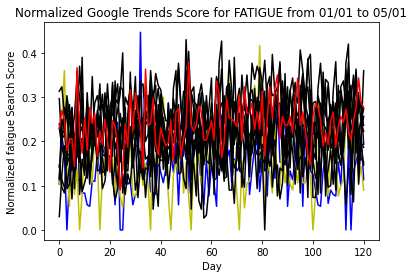

In [292]:
# plot Day (x-axis) vs. Normalized Google Trends Score for fatigue (y-axis) from 2009-2019
yfatigue2009 = fatigue_df['2009'].values; # 2009 score trend
yfatigue2010 = fatigue_df['2010'].values; 
yfatigue2011 = fatigue_df['2011'].values; 
yfatigue2012 = fatigue_df['2012'].values; 
yfatigue2013 = fatigue_df['2013'].values; 
yfatigue2014 = fatigue_df['2014'].values; 
yfatigue2015 = fatigue_df['2015'].values; 
yfatigue2016 = fatigue_df['2016'].values; 
yfatigue2017 = fatigue_df['2017'].values; 
yfatigue2018 = fatigue_df['2018'].values; 
yfatigue2019 = fatigue_df['2019'].values; 
yfatigue2020 = fatigue_df['2020'].values; 
# x-axis from 0 to 120 (121 days)
# H1N1: January 2009 to August 2010
# Coronavirus: January 2020 to Present
plt.plot(yfatigue2009,'b');
plt.plot(yfatigue2010,'y');
plt.plot(yfatigue2011,'k');
plt.plot(yfatigue2012,'k');
plt.plot(yfatigue2013,'k');
plt.plot(yfatigue2014,'k');
plt.plot(yfatigue2015,'k');
plt.plot(yfatigue2016,'k');
plt.plot(yfatigue2017,'k');
plt.plot(yfatigue2018,'k');
plt.plot(yfatigue2019,'k');
plt.plot(yfatigue2020,'r');
plt.title(label = 'Normalized Google Trends Score for FATIGUE from 01/01 to 05/01')
plt.xlabel("Day");
plt.ylabel("Normalized fatigue Search Score");


Text(0, 0.5, 'ytrain_fatigue_pred')

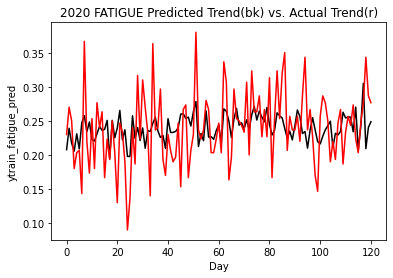

In [371]:
# MLR on 2011-2019 vs 2020
Xtrain_fatigue = fatigue_df[['2011','2012','2013','2014','2015','2016','2017','2018','2019']].values
ytrain_fatigue = fatigue_df['2020'].values

beta_fatigue = fit_mult_linear(Xtrain_fatigue, ytrain_fatigue)
ones = np.ones((Xtrain_fatigue.shape[0],1))
Xt_orig = Xtrain_fatigue
Xtrain_fatigue = np.hstack((ones,Xt_orig))
Xmat_train = np.matrix(Xtrain_fatigue)
ymat = np.matrix(ytrain_fatigue)

ytrain_fatigue_pred = Xmat_train*beta_fatigue
errs = np.array(ymat - ytrain_fatigue_pred)
lossm = np.sum(errs**2)

plt.title('2020 FATIGUE Predicted Trend(bk) vs. Actual Trend(r)')
plt.plot(ytrain_fatigue_pred,'k')  # predicted 2020
plt.plot(ytrain_fatigue, 'r')      # actual 2020
plt.xlabel("Day")
plt.ylabel("ytrain_fatigue_pred")



In [0]:
# MLR on 2011-2019 vs 2010
Xtrain_fatigue = fatigue_df[['2011','2012','2013','2014','2015','2016','2017','2018','2019']].values
ytrain_fatigue1 = fatigue_df['2009'].values

beta_fatigue1 = fit_mult_linear(Xtrain_fatigue, ytrain_fatigue1)
ymat1 = np.matrix(ytrain_fatigue1)

ytrain_fatigue_pred1 = Xmat_train*beta_fatigue1
errs1 = np.array(ymat1 - ytrain_fatigue_pred1)
lossm1 = np.sum(errs1**2)

In [0]:
Xtrain_fatigue = fatigue_df[['2011','2012','2013','2014','2015','2016','2017','2018','2019']].values
ytrain_fatigue2 = fatigue_df['2010'].values

beta_fatigue2 = fit_mult_linear(Xtrain_fatigue, ytrain_fatigue2)
ymat2 = np.matrix(ytrain_fatigue2)

ytrain_fatigue_pred2 = Xmat_train*beta_fatigue2
errs2 = np.array(ymat2 - ytrain_fatigue_pred2)
lossm2 = np.sum(errs2**2)



In [0]:
anosmia_normalized2020 = calculate_normscore(kw_list9, 2020)
anosmia_normalized2019 = calculate_normscore(kw_list9, 2019)
anosmia_normalized2018 = calculate_normscore(kw_list9, 2018)
anosmia_normalized2017 = calculate_normscore(kw_list9, 2017)
anosmia_normalized2016 = calculate_normscore(kw_list9, 2016)
anosmia_normalized2015 = calculate_normscore(kw_list9, 2015)
anosmia_normalized2014 = calculate_normscore(kw_list9, 2014)
anosmia_normalized2013 = calculate_normscore(kw_list9, 2013)
anosmia_normalized2012 = calculate_normscore(kw_list9, 2012)
anosmia_normalized2011 = calculate_normscore(kw_list9, 2011)
anosmia_normalized2010 = calculate_normscore(kw_list9, 2010)
anosmia_normalized2009 = calculate_normscore(kw_list9, 2009)

In [262]:
print("Normalized daily Google Trends scores for the symptom anosmia between 01/01-05/01 from 2009 to 2019")
anosmia_normalized2012list = anosmia_normalized2012.drop(labels = [pd.Timestamp('2012-02-09')]).tolist()
anosmia_normalized2016list = anosmia_normalized2016.drop(labels = [pd.Timestamp('2016-02-09')]).tolist()
anosmia_normalized2020list = anosmia_normalized2020.drop(labels = [pd.Timestamp('2020-02-09')]).tolist()
anosmia_dict = {'2009': anosmia_normalized2009.tolist(), '2010': anosmia_normalized2010.tolist(), '2011': anosmia_normalized2011.tolist(), '2012': anosmia_normalized2012list, '2013': anosmia_normalized2013.tolist(), '2014': anosmia_normalized2014.tolist(), '2015': anosmia_normalized2015.tolist(), '2016': anosmia_normalized2016list, '2017': anosmia_normalized2017.tolist(), '2018': anosmia_normalized2018.tolist(), '2019': anosmia_normalized2019.tolist(), '2020': anosmia_normalized2020list }
anosmia_df = pd.DataFrame(anosmia_dict)
anosmia_df

Normalized daily Google Trends scores for the symptom anosmia between 01/01-05/01 from 2009 to 2019


,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,0.0,0.0,0.000,0.000,0.102,0.0,0.216,0.000,0.000,0.000,0.400,0.014
1,0.0,0.0,0.000,0.000,0.080,0.0,0.090,0.000,0.000,0.000,0.164,0.010
2,0.0,0.0,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.080,0.010
3,0.0,0.0,0.200,0.086,0.080,0.0,0.000,0.068,0.258,0.240,0.222,0.000
4,0.0,0.0,0.000,0.000,0.000,0.0,0.080,0.136,0.000,0.000,0.172,0.024
...,...,...,...,...,...,...,...,...,...,...,...,...
116,0.0,0.0,0.000,0.084,0.000,0.0,0.080,0.194,0.252,0.000,0.000,0.054
117,0.0,0.0,0.000,0.106,0.102,0.0,0.080,0.064,0.088,0.210,0.092,0.034
118,0.0,0.0,0.094,0.000,0.000,0.0,0.000,0.000,0.106,0.292,0.000,0.056
119,0.0,0.0,0.120,0.000,0.078,0.0,0.000,0.000,0.100,0.164,0.000,0.036


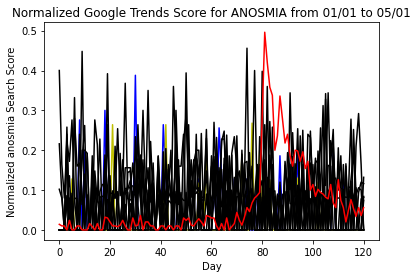

In [293]:
# plot Day (x-axis) vs. Normalized Google Trends Score for anosmia (y-axis) from 2009-2019
yanosmia2009 = anosmia_df['2009'].values; # 2009 score trend
yanosmia2010 = anosmia_df['2010'].values; 
yanosmia2011 = anosmia_df['2011'].values; 
yanosmia2012 = anosmia_df['2012'].values; 
yanosmia2013 = anosmia_df['2013'].values; 
yanosmia2014 = anosmia_df['2014'].values; 
yanosmia2015 = anosmia_df['2015'].values; 
yanosmia2016 = anosmia_df['2016'].values; 
yanosmia2017 = anosmia_df['2017'].values; 
yanosmia2018 = anosmia_df['2018'].values; 
yanosmia2019 = anosmia_df['2019'].values; 
yanosmia2020 = anosmia_df['2020'].values; 
# x-axis from 0 to 120 (121 days)
# H1N1: January 2009 to August 2010
# Coronavirus: January 2020 to Present
plt.plot(yanosmia2009,'b');
plt.plot(yanosmia2010,'y');
plt.plot(yanosmia2011,'k');
plt.plot(yanosmia2012,'k');
plt.plot(yanosmia2013,'k');
plt.plot(yanosmia2014,'k');
plt.plot(yanosmia2015,'k');
plt.plot(yanosmia2016,'k');
plt.plot(yanosmia2017,'k');
plt.plot(yanosmia2018,'k');
plt.plot(yanosmia2019,'k');
plt.plot(yanosmia2020,'r');
plt.title(label = 'Normalized Google Trends Score for ANOSMIA from 01/01 to 05/01')
plt.xlabel("Day");
plt.ylabel("Normalized anosmia Search Score");


Text(0, 0.5, 'ytrain_anosmia_pred')

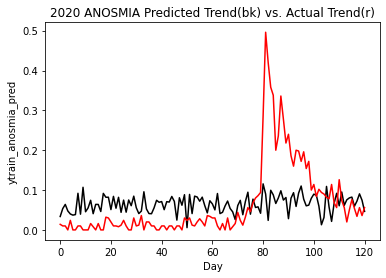

In [379]:
# MLR on 2011-2019 vs 2020
Xtrain_anosmia = anosmia_df[['2011','2012','2013','2014','2015','2016','2017','2018','2019']].values
ytrain_anosmia = anosmia_df['2020'].values

beta_anosmia = fit_mult_linear(Xtrain_anosmia, ytrain_anosmia)
ones = np.ones((Xtrain_anosmia.shape[0],1))
Xt_orig = Xtrain_anosmia
Xtrain_anosmia = np.hstack((ones,Xt_orig))
Xmat_train = np.matrix(Xtrain_anosmia)
ymat = np.matrix(ytrain_anosmia)

ytrain_anosmia_pred = Xmat_train*beta_anosmia
errs = np.array(ymat - ytrain_anosmia_pred)
lossm = np.sum(errs**2)


plt.title('2020 ANOSMIA Predicted Trend(bk) vs. Actual Trend(r)')
plt.plot(ytrain_anosmia_pred,'k')  # predicted 2020
plt.plot(ytrain_anosmia, 'r')      # actual 2020
plt.xlabel("Day")
plt.ylabel("ytrain_anosmia_pred")


In [0]:
# MLR on 2011-2019 vs 2010
Xtrain_anosmia = anosmia_df[['2011','2012','2013','2014','2015','2016','2017','2018','2019']].values
ytrain_anosmia1 = anosmia_df['2009'].values

beta_anosmia1 = fit_mult_linear(Xtrain_anosmia, ytrain_anosmia1)
ymat1 = np.matrix(ytrain_anosmia1)

ytrain_anosmia_pred1 = Xmat_train*beta_anosmia1
errs1 = np.array(ymat1 - ytrain_anosmia_pred1)
lossm1 = np.sum(errs1**2)

In [0]:
Xtrain_anosmia = anosmia_df[['2011','2012','2013','2014','2015','2016','2017','2018','2019']].values
ytrain_anosmia2 = anosmia_df['2010'].values

beta_anosmia2 = fit_mult_linear(Xtrain_anosmia, ytrain_anosmia2)
ymat2 = np.matrix(ytrain_anosmia2)

ytrain_anosmia_pred2 = Xmat_train*beta_anosmia2
errs2 = np.array(ymat2 - ytrain_anosmia_pred2)
lossm2 = np.sum(errs2**2)


In [0]:
chills_normalized2020 = calculate_normscore(kw_list10, 2020)
chills_normalized2019 = calculate_normscore(kw_list10, 2019)
chills_normalized2018 = calculate_normscore(kw_list10, 2018)
chills_normalized2017 = calculate_normscore(kw_list10, 2017)
chills_normalized2016 = calculate_normscore(kw_list10, 2016)
chills_normalized2015 = calculate_normscore(kw_list10, 2015)
chills_normalized2014 = calculate_normscore(kw_list10, 2014)
chills_normalized2013 = calculate_normscore(kw_list10, 2013)
chills_normalized2012 = calculate_normscore(kw_list10, 2012)
chills_normalized2011 = calculate_normscore(kw_list10, 2011)
chills_normalized2010 = calculate_normscore(kw_list10, 2010)
chills_normalized2009 = calculate_normscore(kw_list10, 2009)

In [267]:
print("Normalized daily Google Trends scores for the symptom chills between 01/01-05/01 from 2009 to 2019")
chills_normalized2012list = chills_normalized2012.drop(labels = [pd.Timestamp('2012-02-09')]).tolist()
chills_normalized2016list = chills_normalized2016.drop(labels = [pd.Timestamp('2016-02-09')]).tolist()
chills_normalized2020list = chills_normalized2020.drop(labels = [pd.Timestamp('2020-02-09')]).tolist()
chills_dict = {'2009': chills_normalized2009.tolist(), '2010': chills_normalized2010.tolist(), '2011': chills_normalized2011.tolist(), '2012': chills_normalized2012list, '2013': chills_normalized2013.tolist(), '2014': chills_normalized2014.tolist(), '2015': chills_normalized2015.tolist(), '2016': chills_normalized2016list, '2017': chills_normalized2017.tolist(), '2018': chills_normalized2018.tolist(), '2019': chills_normalized2019.tolist(), '2020': chills_normalized2020list }
chills_df = pd.DataFrame(chills_dict)
chills_df

Normalized daily Google Trends scores for the symptom chills between 01/01-05/01 from 2009 to 2019


,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,0.190000,0.206667,0.130000,0.406667,0.490000,0.200000,0.060000,0.283333,0.050000,0.423333,0.246667,0.133333
1,0.130000,0.000000,0.180000,0.240000,0.170000,0.253333,0.150000,0.190000,0.180000,0.370000,0.316667,0.133333
2,0.156667,0.163333,0.293333,0.176667,0.466667,0.280000,0.246667,0.186667,0.283333,0.393333,0.340000,0.133333
3,0.000000,0.226667,0.323333,0.210000,0.273333,0.240000,0.296667,0.203333,0.243333,0.253333,0.366667,0.196667
4,0.413333,0.213333,0.246667,0.213333,0.363333,0.353333,0.110000,0.103333,0.163333,0.306667,0.243333,0.116667
...,...,...,...,...,...,...,...,...,...,...,...,...
116,0.193333,0.100000,0.133333,0.070000,0.180000,0.063333,0.203333,0.050000,0.156667,0.243333,0.210000,0.220000
117,0.000000,0.103333,0.256667,0.300000,0.346667,0.300000,0.266667,0.096667,0.000000,0.120000,0.400000,0.170000
118,0.000000,0.000000,0.203333,0.166667,0.066667,0.096667,0.276667,0.206667,0.096667,0.113333,0.320000,0.146667
119,0.000000,0.353333,0.173333,0.333333,0.233333,0.170000,0.206667,0.430000,0.046667,0.280000,0.323333,0.120000


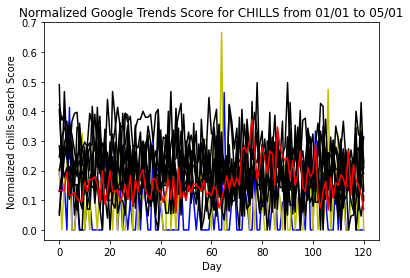

In [294]:
# plot Day (x-axis) vs. Normalized Google Trends Score for chills (y-axis) from 2009-2019
ychills2009 = chills_df['2009'].values; # 2009 score trend
ychills2010 = chills_df['2010'].values; 
ychills2011 = chills_df['2011'].values; 
ychills2012 = chills_df['2012'].values; 
ychills2013 = chills_df['2013'].values; 
ychills2014 = chills_df['2014'].values; 
ychills2015 = chills_df['2015'].values; 
ychills2016 = chills_df['2016'].values; 
ychills2017 = chills_df['2017'].values; 
ychills2018 = chills_df['2018'].values; 
ychills2019 = chills_df['2019'].values; 
ychills2020 = chills_df['2020'].values; 
# x-axis from 0 to 120 (121 days)
# H1N1: January 2009 to August 2010
# Coronavirus: January 2020 to Present
plt.plot(ychills2009,'b');
plt.plot(ychills2010,'y');
plt.plot(ychills2011,'k');
plt.plot(ychills2012,'k');
plt.plot(ychills2013,'k');
plt.plot(ychills2014,'k');
plt.plot(ychills2015,'k');
plt.plot(ychills2016,'k');
plt.plot(ychills2017,'k');
plt.plot(ychills2018,'k');
plt.plot(ychills2019,'k');
plt.plot(ychills2020,'r');
plt.title(label = 'Normalized Google Trends Score for CHILLS from 01/01 to 05/01')
plt.xlabel("Day");
plt.ylabel("Normalized chills Search Score");


Text(0, 0.5, 'ytrain_chills_pred')

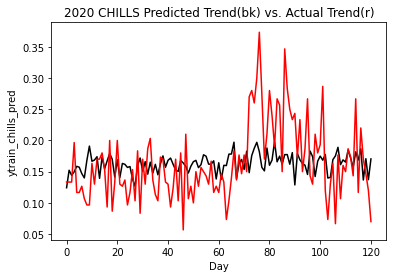

In [373]:
# MLR on 2011-2019 vs 2020
Xtrain_chills = chills_df[['2011','2012','2013','2014','2015','2016','2017','2018','2019']].values
ytrain_chills = chills_df['2020'].values

beta_chills = fit_mult_linear(Xtrain_chills, ytrain_chills)
ones = np.ones((Xtrain_chills.shape[0],1))
Xt_orig = Xtrain_chills
Xtrain_chills = np.hstack((ones,Xt_orig))
Xmat_train = np.matrix(Xtrain_chills)
ymat = np.matrix(ytrain_chills)

ytrain_chills_pred = Xmat_train*beta_chills
errs = np.array(ymat - ytrain_chills_pred)
lossm = np.sum(errs**2)

plt.title('2020 CHILLS Predicted Trend(bk) vs. Actual Trend(r)')
plt.plot(ytrain_chills_pred,'k')  # predicted 2020
plt.plot(ytrain_chills, 'r')      # actual 2020
plt.xlabel("Day")
plt.ylabel("ytrain_chills_pred")


In [0]:
# MLR on 2011-2019 vs 2010
Xtrain_chills = chills_df[['2011','2012','2013','2014','2015','2016','2017','2018','2019']].values
ytrain_chills1 = chills_df['2009'].values

beta_chills1 = fit_mult_linear(Xtrain_chills, ytrain_chills1)
ymat1 = np.matrix(ytrain_chills1)

ytrain_chills_pred1 = Xmat_train*beta_chills1
errs1 = np.array(ymat1 - ytrain_chills_pred1)
lossm1 = np.sum(errs1**2)

In [0]:
Xtrain_chills = chills_df[['2011','2012','2013','2014','2015','2016','2017','2018','2019']].values
ytrain_chills2 = chills_df['2010'].values

beta_chills2 = fit_mult_linear(Xtrain_chills, ytrain_chills2)
ymat2 = np.matrix(ytrain_chills2)

ytrain_chills_pred2 = Xmat_train*beta_chills2
errs2 = np.array(ymat2 - ytrain_chills_pred2)
lossm2 = np.sum(errs2**2)



In [0]:
toes_normalized2020 = calculate_normscore(kw_list11, 2020)
toes_normalized2019 = calculate_normscore(kw_list11, 2019)
toes_normalized2018 = calculate_normscore(kw_list11, 2018)
toes_normalized2017 = calculate_normscore(kw_list11, 2017)
toes_normalized2016 = calculate_normscore(kw_list11, 2016)
toes_normalized2015 = calculate_normscore(kw_list11, 2015)
toes_normalized2014 = calculate_normscore(kw_list11, 2014)
toes_normalized2013 = calculate_normscore(kw_list11, 2013)
toes_normalized2012 = calculate_normscore(kw_list11, 2012)
toes_normalized2011 = calculate_normscore(kw_list11, 2011)
toes_normalized2010 = calculate_normscore(kw_list11, 2010)
toes_normalized2009 = calculate_normscore(kw_list11, 2009)

In [273]:
print("Normalized daily Google Trends scores for the symptom toes between 01/01-05/01 from 2009 to 2019")
toes_normalized2012list = toes_normalized2012.drop(labels = [pd.Timestamp('2012-02-09')]).tolist()
toes_normalized2016list = toes_normalized2016.drop(labels = [pd.Timestamp('2016-02-09')]).tolist()
toes_normalized2020list = toes_normalized2020.drop(labels = [pd.Timestamp('2020-02-09')]).tolist()
toes_dict = {'2009': toes_normalized2009.tolist(), '2010': toes_normalized2010.tolist(), '2011': toes_normalized2011.tolist(), '2012': toes_normalized2012list, '2013': toes_normalized2013.tolist(), '2014': toes_normalized2014.tolist(), '2015': toes_normalized2015.tolist(), '2016': toes_normalized2016list, '2017': toes_normalized2017.tolist(), '2018': toes_normalized2018.tolist(), '2019': toes_normalized2019.tolist(), '2020': toes_normalized2020list }
toes_df = pd.DataFrame(toes_dict)
toes_df

Normalized daily Google Trends scores for the symptom toes between 01/01-05/01 from 2009 to 2019


,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00,0.0,0.0,0.000000,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.226667,0.000000,0.42,0.0,0.0,0.266667,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00,0.0,0.0,0.000000,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00,0.0,0.0,0.000000,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
116,0.0,0.0,0.0,0.0,0.0,0.000000,0.346667,0.00,0.0,0.0,0.000000,0.000000
117,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00,0.0,0.0,0.000000,0.326667
118,0.0,0.0,0.0,0.0,0.0,0.213333,0.000000,0.00,0.0,0.0,0.000000,0.320000
119,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00,0.0,0.0,0.000000,0.000000


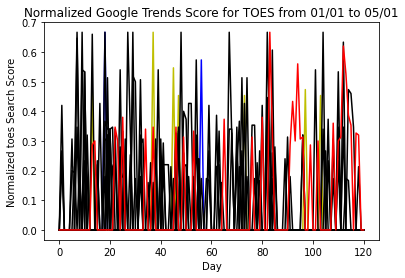

In [295]:
# plot Day (x-axis) vs. Normalized Google Trends Score for toes (y-axis) from 2009-2019
ytoes2009 = toes_df['2009'].values; # 2009 score trend
ytoes2010 = toes_df['2010'].values; 
ytoes2011 = toes_df['2011'].values; 
ytoes2012 = toes_df['2012'].values; 
ytoes2013 = toes_df['2013'].values; 
ytoes2014 = toes_df['2014'].values; 
ytoes2015 = toes_df['2015'].values; 
ytoes2016 = toes_df['2016'].values; 
ytoes2017 = toes_df['2017'].values; 
ytoes2018 = toes_df['2018'].values; 
ytoes2019 = toes_df['2019'].values; 
ytoes2020 = toes_df['2020'].values; 
# x-axis from 0 to 120 (121 days)
# H1N1: January 2009 to August 2010
# Coronavirus: January 2020 to Present
plt.plot(ytoes2009,'b');
plt.plot(ytoes2010,'y');
plt.plot(ytoes2011,'k');
plt.plot(ytoes2012,'k');
plt.plot(ytoes2013,'k');
plt.plot(ytoes2014,'k');
plt.plot(ytoes2015,'k');
plt.plot(ytoes2016,'k');
plt.plot(ytoes2017,'k');
plt.plot(ytoes2018,'k');
plt.plot(ytoes2019,'k');
plt.plot(ytoes2020,'r');
plt.title(label = 'Normalized Google Trends Score for TOES from 01/01 to 05/01')
plt.xlabel("Day");
plt.ylabel("Normalized toes Search Score");


Text(0, 0.5, 'ytrain_toes_pred')

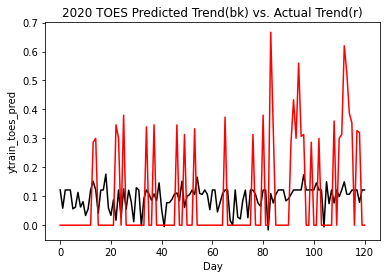

In [374]:
# MLR on 2011-2019 vs 2020
Xtrain_toes = toes_df[['2011','2012','2013','2014','2015','2016','2017','2018','2019']].values
ytrain_toes = toes_df['2020'].values

beta_toes = fit_mult_linear(Xtrain_toes, ytrain_toes)
ones = np.ones((Xtrain_toes.shape[0],1))
Xt_orig = Xtrain_toes
Xtrain_toes = np.hstack((ones,Xt_orig))
Xmat_train = np.matrix(Xtrain_toes)
ymat = np.matrix(ytrain_toes)

ytrain_toes_pred = Xmat_train*beta_toes
errs = np.array(ymat - ytrain_toes_pred)
lossm = np.sum(errs**2)

plt.title('2020 TOES Predicted Trend(bk) vs. Actual Trend(r)')
plt.plot(ytrain_toes_pred,'k')  # predicted 2020
plt.plot(ytrain_toes, 'r')      # actual 2020
plt.xlabel("Day")
plt.ylabel("ytrain_toes_pred")

In [0]:
# MLR on 2011-2019 vs 2010
Xtrain_toes = toes_df[['2011','2012','2013','2014','2015','2016','2017','2018','2019']].values
ytrain_toes1 = toes_df['2009'].values

beta_toes1 = fit_mult_linear(Xtrain_toes, ytrain_toes1)
ymat1 = np.matrix(ytrain_toes1)

ytrain_toes_pred1 = Xmat_train*beta_toes1
errs1 = np.array(ymat1 - ytrain_toes_pred1)
lossm1 = np.sum(errs1**2)

In [0]:
Xtrain_toes = toes_df[['2011','2012','2013','2014','2015','2016','2017','2018','2019']].values
ytrain_toes2 = toes_df['2010'].values

beta_toes2 = fit_mult_linear(Xtrain_toes, ytrain_toes2)
ymat2 = np.matrix(ytrain_toes2)

ytrain_toes_pred2 = Xmat_train*beta_toes2
errs2 = np.array(ymat2 - ytrain_toes_pred2)
lossm2 = np.sum(errs2**2)


In [0]:
covid_normalized2020 = calculate_normscore(kw_list12, 2020)
covid_normalized2019 = calculate_normscore(kw_list12, 2019)
covid_normalized2018 = calculate_normscore(kw_list12, 2018)
covid_normalized2017 = calculate_normscore(kw_list12, 2017)
covid_normalized2016 = calculate_normscore(kw_list12, 2016)
covid_normalized2015 = calculate_normscore(kw_list12, 2015)
covid_normalized2014 = calculate_normscore(kw_list12, 2014)
covid_normalized2013 = calculate_normscore(kw_list12, 2013)
covid_normalized2012 = calculate_normscore(kw_list12, 2012)
covid_normalized2011 = calculate_normscore(kw_list12, 2011)
covid_normalized2010 = calculate_normscore(kw_list12, 2010)
covid_normalized2009 = calculate_normscore(kw_list12, 2009)

In [278]:
print("Normalized daily Google Trends scores for the symptom covid 01/01-05/01 from 2009 to 2019")
covid_normalized2012list = covid_normalized2012.drop(labels = [pd.Timestamp('2012-02-09')]).tolist()
covid_normalized2016list = covid_normalized2016.drop(labels = [pd.Timestamp('2016-02-09')]).tolist()
covid_normalized2020list = covid_normalized2020.drop(labels = [pd.Timestamp('2020-02-09')]).tolist()
covid_dict = {'2009': covid_normalized2009.tolist(), '2010': covid_normalized2010.tolist(), '2011': covid_normalized2011.tolist(), '2012': covid_normalized2012list, '2013': covid_normalized2013.tolist(), '2014': covid_normalized2014.tolist(), '2015': covid_normalized2015.tolist(), '2016': covid_normalized2016list, '2017': covid_normalized2017.tolist(), '2018': covid_normalized2018.tolist(), '2019': covid_normalized2019.tolist(), '2020': covid_normalized2020list }
covid_df = pd.DataFrame(covid_dict)
covid_df

Normalized daily Google Trends scores for the symptom covid 01/01-05/01 from 2009 to 2019


,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.150000,0.000000
1,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.190000,0.000000,0.000000,0.000000
2,0.000000,0.0,0.0,0.0,0.0,0.136667,0.000000,0.0,0.000000,0.160000,0.000000,0.000000
3,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.156667,0.110000,0.000000
4,0.000000,0.0,0.0,0.0,0.0,0.000000,0.246667,0.0,0.173333,0.000000,0.256667,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
116,0.000000,0.0,0.0,0.0,0.0,0.170000,0.250000,0.0,0.000000,0.166667,0.146667,0.070000
117,0.333333,0.0,0.0,0.0,0.2,0.136667,0.000000,0.0,0.000000,0.206667,0.000000,0.063333
118,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.210000,0.000000,0.000000,0.063333
119,0.000000,0.0,0.0,0.0,0.0,0.130000,0.000000,0.0,0.000000,0.000000,0.000000,0.060000


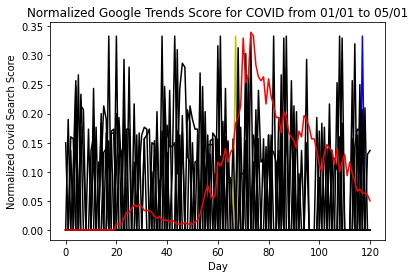

In [296]:
# plot Day (x-axis) vs. Normalized Google Trends Score for covid (y-axis) from 2009-2019
ycovid2009 = covid_df['2009'].values; # 2009 score trend
ycovid2010 = covid_df['2010'].values; 
ycovid2011 = covid_df['2011'].values; 
ycovid2012 = covid_df['2012'].values; 
ycovid2013 = covid_df['2013'].values; 
ycovid2014 = covid_df['2014'].values; 
ycovid2015 = covid_df['2015'].values; 
ycovid2016 = covid_df['2016'].values; 
ycovid2017 = covid_df['2017'].values; 
ycovid2018 = covid_df['2018'].values; 
ycovid2019 = covid_df['2019'].values; 
ycovid2020 = covid_df['2020'].values; 
# x-axis from 0 to 120 (121 days)
# H1N1: January 2009 to August 2010
# Coronavirus: January 2020 to Present
plt.plot(ycovid2009,'b');
plt.plot(ycovid2010,'y');
plt.plot(ycovid2011,'k');
plt.plot(ycovid2012,'k');
plt.plot(ycovid2013,'k');
plt.plot(ycovid2014,'k');
plt.plot(ycovid2015,'k');
plt.plot(ycovid2016,'k');
plt.plot(ycovid2017,'k');
plt.plot(ycovid2018,'k');
plt.plot(ycovid2019,'k');
plt.plot(ycovid2020,'r');
plt.title(label = 'Normalized Google Trends Score for COVID from 01/01 to 05/01')
plt.xlabel("Day");
plt.ylabel("Normalized covid Search Score");


Text(0, 0.5, 'ytrain_covid_pred')

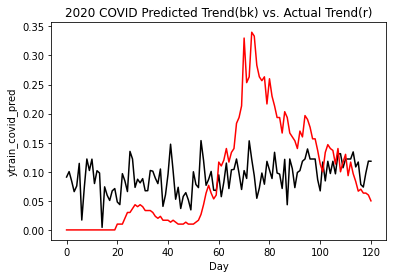

In [375]:
# MLR on 2011-2019 vs 2020
Xtrain_covid = covid_df[['2011','2012','2013','2014','2015','2016','2017','2018','2019']].values
ytrain_covid = covid_df['2020'].values

beta_covid = fit_mult_linear(Xtrain_covid, ytrain_covid)
ones = np.ones((Xtrain_covid.shape[0],1))
Xt_orig = Xtrain_covid
Xtrain_covid = np.hstack((ones,Xt_orig))
Xmat_train = np.matrix(Xtrain_covid)
ymat = np.matrix(ytrain_covid)

ytrain_covid_pred = Xmat_train*beta_covid
errs = np.array(ymat - ytrain_covid_pred)
lossm = np.sum(errs**2)

plt.title('2020 COVID Predicted Trend(bk) vs. Actual Trend(r)')
plt.plot(ytrain_covid_pred,'k')  # predicted 2020
plt.plot(ytrain_covid, 'r')      # actual 2020
plt.xlabel("Day")
plt.ylabel("ytrain_covid_pred")

In [0]:
# MLR on 2011-2019 vs 2010
Xtrain_covid = covid_df[['2011','2012','2013','2014','2015','2016','2017','2018','2019']].values
ytrain_covid1 = covid_df['2009'].values

beta_covid1 = fit_mult_linear(Xtrain_covid, ytrain_covid1)
ymat1 = np.matrix(ytrain_covid1)

ytrain_covid_pred1 = Xmat_train*beta_covid1
errs1 = np.array(ymat1 - ytrain_covid_pred1)
lossm1 = np.sum(errs1**2)

In [0]:
Xtrain_covid = covid_df[['2011','2012','2013','2014','2015','2016','2017','2018','2019']].values
ytrain_covid2 = covid_df['2010'].values

beta_covid2 = fit_mult_linear(Xtrain_covid, ytrain_covid2)
ymat2 = np.matrix(ytrain_covid2)

ytrain_covid_pred2 = Xmat_train*beta_covid2
errs2 = np.array(ymat2 - ytrain_covid_pred2)
lossm2 = np.sum(errs2**2)


In [0]:
flu_normalized2020 = calculate_normscore(kw_list13, 2020)
flu_normalized2019 = calculate_normscore(kw_list13, 2019)
flu_normalized2018 = calculate_normscore(kw_list13, 2018)
flu_normalized2017 = calculate_normscore(kw_list13, 2017)
flu_normalized2016 = calculate_normscore(kw_list13, 2016)
flu_normalized2015 = calculate_normscore(kw_list13, 2015)
flu_normalized2014 = calculate_normscore(kw_list13, 2014)
flu_normalized2013 = calculate_normscore(kw_list13, 2013)
flu_normalized2012 = calculate_normscore(kw_list13, 2012)
flu_normalized2011 = calculate_normscore(kw_list13, 2011)
flu_normalized2010 = calculate_normscore(kw_list13, 2010)
flu_normalized2009 = calculate_normscore(kw_list13, 2009)

In [283]:
print("Normalized daily Google Trends scores for the symptom flu 01/01-05/01 from 2009 to 2019")
flu_normalized2012list = flu_normalized2012.drop(labels = [pd.Timestamp('2012-02-09')]).tolist()
flu_normalized2016list = flu_normalized2016.drop(labels = [pd.Timestamp('2016-02-09')]).tolist()
flu_normalized2020list = flu_normalized2020.drop(labels = [pd.Timestamp('2020-02-09')]).tolist()
flu_dict = {'2009': flu_normalized2009.tolist(), '2010': flu_normalized2010.tolist(), '2011': flu_normalized2011.tolist(), '2012': flu_normalized2012list, '2013': flu_normalized2013.tolist(), '2014': flu_normalized2014.tolist(), '2015': flu_normalized2015.tolist(), '2016': flu_normalized2016list, '2017': flu_normalized2017.tolist(), '2018': flu_normalized2018.tolist(), '2019': flu_normalized2019.tolist() , '2020': flu_normalized2020list}
flu_df = pd.DataFrame(flu_dict)
flu_df

Normalized daily Google Trends scores for the symptom flu 01/01-05/01 from 2009 to 2019


,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,0.020,0.240,0.180,0.395,0.115,0.555,0.395,0.175,0.250,0.100,0.145,0.285
1,0.040,0.500,0.380,0.365,0.140,0.260,0.545,0.175,0.405,0.140,0.440,0.180
2,0.015,0.240,0.270,0.505,0.125,0.515,0.370,0.170,0.195,0.120,0.345,0.250
3,0.030,0.195,0.565,0.405,0.185,0.375,0.410,0.155,0.345,0.130,0.130,0.245
4,0.010,0.190,0.395,0.365,0.115,0.495,0.435,0.230,0.365,0.110,0.215,0.300
...,...,...,...,...,...,...,...,...,...,...,...,...
116,0.510,0.180,0.240,0.180,0.035,0.155,0.190,0.120,0.130,0.045,0.070,0.070
117,0.515,0.180,0.180,0.330,0.035,0.235,0.105,0.170,0.140,0.050,0.200,0.065
118,0.505,0.065,0.095,0.430,0.050,0.160,0.120,0.190,0.220,0.065,0.080,0.075
119,0.495,0.070,0.200,0.340,0.040,0.160,0.105,0.150,0.210,0.065,0.170,0.060


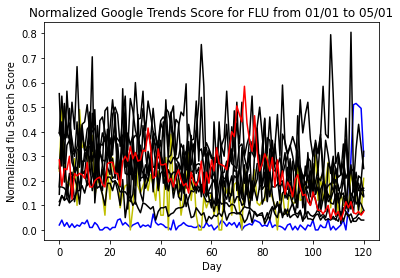

In [297]:
# plot Day (x-axis) vs. Normalized Google Trends Score for flu (y-axis) from 2009-2019
yflu2009 = flu_df['2009'].values; # 2009 score trend
yflu2010 = flu_df['2010'].values; 
yflu2011 = flu_df['2011'].values; 
yflu2012 = flu_df['2012'].values; 
yflu2013 = flu_df['2013'].values; 
yflu2014 = flu_df['2014'].values; 
yflu2015 = flu_df['2015'].values; 
yflu2016 = flu_df['2016'].values; 
yflu2017 = flu_df['2017'].values; 
yflu2018 = flu_df['2018'].values; 
yflu2019 = flu_df['2019'].values; 
yflu2020 = flu_df['2020'].values; 
# x-axis from 0 to 120 (121 days)
# H1N1: January 2009 to August 2010
# Coronavirus: January 2020 to Present
plt.plot(yflu2009,'b');
plt.plot(yflu2010,'y');
plt.plot(yflu2011,'k');
plt.plot(yflu2012,'k');
plt.plot(yflu2013,'k');
plt.plot(yflu2014,'k');
plt.plot(yflu2015,'k');
plt.plot(yflu2016,'k');
plt.plot(yflu2017,'k');
plt.plot(yflu2018,'k');
plt.plot(yflu2019,'k');
plt.plot(yflu2020,'r');
plt.title(label = 'Normalized Google Trends Score for FLU from 01/01 to 05/01')
plt.xlabel("Day");
plt.ylabel("Normalized flu Search Score");


Text(0, 0.5, 'ytrain_flu_pred')

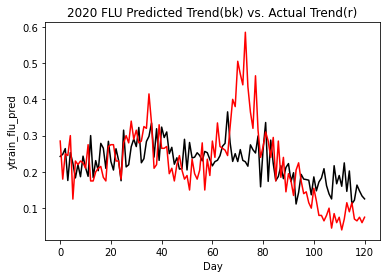

In [378]:
# MLR on 2011-2019 vs 2020
Xtrain_flu = flu_df[['2011','2012','2013','2014','2015','2016','2017','2018','2019']].values
ytrain_flu = flu_df['2020'].values

beta_flu = fit_mult_linear(Xtrain_flu, ytrain_flu)
ones = np.ones((Xtrain_flu.shape[0],1))
Xt_orig = Xtrain_flu
Xtrain_flu = np.hstack((ones,Xt_orig))
Xmat_train = np.matrix(Xtrain_flu)
ymat = np.matrix(ytrain_flu)

ytrain_flu_pred = Xmat_train*beta_flu
errs = np.array(ymat - ytrain_flu_pred)
lossm = np.sum(errs**2)

plt.title('2020 FLU Predicted Trend(bk) vs. Actual Trend(r)')
plt.plot(ytrain_flu_pred,'k')  # predicted 2020
plt.plot(ytrain_flu, 'r')      # actual 2020
plt.xlabel("Day")
plt.ylabel("ytrain_flu_pred")


Text(0, 0.5, 'ytrain_flu_pred1')

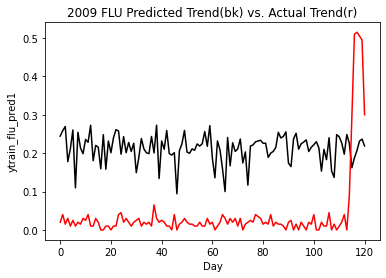

In [380]:
# MLR on 2011-2019 vs 2010
Xtrain_flu = flu_df[['2011','2012','2013','2014','2015','2016','2017','2018','2019']].values
ytrain_flu1 = flu_df['2009'].values

beta_flu1 = fit_mult_linear(Xtrain_flu, ytrain_flu1)
ymat1 = np.matrix(ytrain_flu1)

ytrain_flu_pred1 = Xmat_train*beta_flu1
errs1 = np.array(ymat1 - ytrain_flu_pred1)
lossm1 = np.sum(errs1**2)

plt.title('2009 FLU Predicted Trend(bk) vs. Actual Trend(r)')
plt.plot(ytrain_flu_pred1,'k') # predicted 2009
plt.plot(ytrain_flu1, 'r')     # actual 2009
plt.xlabel("Day")
plt.ylabel("ytrain_flu_pred1")

Text(0, 0.5, 'ytrain_flu_pred2')

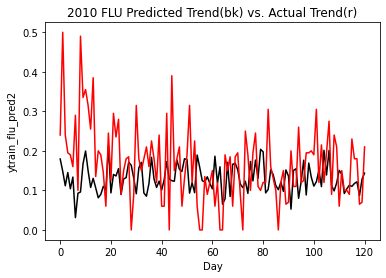

In [384]:
Xtrain_flu = flu_df[['2011','2012','2013','2014','2015','2016','2017','2018','2019']].values
ytrain_flu2 = flu_df['2010'].values

beta_flu2 = fit_mult_linear(Xtrain_flu, ytrain_flu2)
ymat2 = np.matrix(ytrain_flu2)

ytrain_flu_pred2 = Xmat_train*beta_flu2
errs2 = np.array(ymat2 - ytrain_flu_pred2)
lossm2 = np.sum(errs2**2)

plt.title('2010 FLU Predicted Trend(bk) vs. Actual Trend(r)')
plt.plot(ytrain_flu_pred2,'k') # predicted 2009
plt.plot(ytrain_flu2, 'r')     # actual 2009
plt.xlabel("Day")
plt.ylabel("ytrain_flu_pred2")

In [0]:
# only do 2020
tests_normalized2020 = calculate_normscore(kw_list14, 2020)
# tests_normalized2019 = calculate_normscore(kw_list14, 2019)
# tests_normalized2018 = calculate_normscore(kw_list14, 2018)
# tests_normalized2017 = calculate_normscore(kw_list14, 2017)
# tests_normalized2016 = calculate_normscore(kw_list14, 2016)
# tests_normalized2015 = calculate_normscore(kw_list14, 2015)
# tests_normalized2014 = calculate_normscore(kw_list14, 2014)
# tests_normalized2013 = calculate_normscore(kw_list14, 2013)
# tests_normalized2012 = calculate_normscore(kw_list14, 2012)
# tests_normalized2011 = calculate_normscore(kw_list14, 2011)
# tests_normalized2010 = calculate_normscore(kw_list14, 2010)
# tests_normalized2009 = calculate_normscore(kw_list14, 2009)


In [351]:
print("Normalized daily Google Trends scores for the symptom tests between Jan 01 and May 09 from 2009 to 2019")
# tests_normalized2012list = tests_normalized2012.drop(labels = [pd.Timestamp('2012-02-09')]).tolist()
# tests_normalized2016list = tests_normalized2016.drop(labels = [pd.Timestamp('2016-02-09')]).tolist()
tests_normalized2020list = tests_normalized2020.drop(labels = [pd.Timestamp('2020-02-09')]).tolist()
tests_dict = {'2020': tests_normalized2020list}
tests_df = pd.DataFrame(tests_dict)
tests_df

Normalized daily Google Trends scores for the symptom tests between Jan 01 and May 09 from 2009 to 2019


,2020
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000000
...,...
116,0.086667
117,0.053333
118,0.050000
119,0.050000


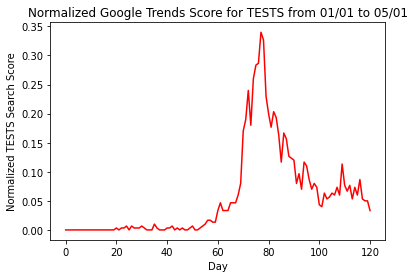

In [352]:
ytests2020 = tests_df['2020'].values; 
plt.plot(ytests2020,'r');
plt.title(label = 'Normalized Google Trends Score for TESTS from 01/01 to 05/01')
plt.xlabel("Day");
plt.ylabel("Normalized TESTS Search Score");
